# Introdução

<h3> ** O principal objetivo deste notebook é praticar o uso do python para análise de dados e uso de alguns modelos de classificação do scikit-learn. ** </h3>


- Neste breve estudo vamos aplicar algumas técnicas de Machine Learning em um dataset orientado a área de vendas.  <br>
- Vamos realizar a análise exploratória dos dados, segmentação e classificação de clientes.  <br>
- O dataset analisado contém 29 atributos e 2.240 instâncias (linhas). <br>
   


<h4> Abaixo estão as descrições dos atributos do Dataset: </h4>
    

- ID             - Customer identifier. 			(Identificador cliente)
- Year_Birth     - Year of birth of the Customer. (Ano de nascimento do cliente)
- Education      - Customer education level. 		(Nível de escolaridade do cliente)
- Marital_Status - Customer's marital status.     (Estado civil do cliente)
- Income 		   - Customer's yearly household income.               (Renda familiar anual do cliente)
- Kidhome 	   - Number of small children in customer's household. (Número de crianças pequenas na casa do cliente)
- Teenhome	   - Number of teenagers in customer's household.      (Número de adolescentes na casa do cliente)	
- Dt_Customer	   - Date of customer's enrollment with the company.   (Data de inscrição do cliente na empresa)
- Recency            - Number of days since the last purchase.            (Número de dias desde a última compra)
- MntWines	   - Amount spent on Wines products in the last 2 years.  (Montante gasto em Vinhos nos últimos 2 anos)
- MntFruits	   - Amount spent on Fruits products in the last 2 years. (Montante gasto em Frutas nos últimos 2 anos)
- MntMeatProducts  - Amount spent on Meat products in the last 2 years. (Montante gasto em produtos à base de carne nos últimos 2 anos)
- MntFishProducts  - Amount spent on Fish products in the last 2 years. (Montante gasto em produtos de peixe nos últimos 2 anos)
- MntSweetProducts - Amount spent on Sweet products in the last 2 years.(Montante gasto em doces nos últimos 2 anos)
- MntGoldProds	 - Amount spent on Gold products in the last 2 years. (Montante gasto em produtos Gold nos últimos 2 anos)
- NumDealsPurchases   - Number of purchases made with discount.              (Número de compras feitas com desconto)
- NumWebPurchases     - Number of purchases made through company's web site. (Número de compras feitas no site da empresa)
- NumCatalogPurchases - Number of purchases made using catalog.	           (Número de compras feitas usando o catálogo)
- NumStorePurchases   - Number of purchases made directly in stores.         (Número de compras feitas diretamente nas lojas)
- NumWebVisitsMonth   - Number of visits to company's web site in the last month.  (Número de visitas ao site da empresa no último mês)
- AcceptedCmp1 - 1 if customer accepted the offer in the 1a campaign, 0 otherwise. (1 se o cliente aceitou a oferta na 1a campanha, 0 caso contrário) 
- AcceptedCmp2 - 1 if customer accepted the offer in the 2a campaign, 0 otherwise. (1 se o cliente aceitou a oferta na 2a campanha, 0 caso contrário) 
- AcceptedCmp3 - 1 if customer accepted the offer in the 3a campaign, 0 otherwise. (1 se o cliente aceitou a oferta na 3a campanha, 0 caso contrário) 
- AcceptedCmp4 - 1 if customer accepted the offer in the 4a campaign, 0 otherwise. (1 se o cliente aceitou a oferta na 4a campanha, 0 caso contrário) 
- AcceptedCmp5 - 1 if customer accepted the offer in the 5a campaign, 0 otherwise. (1 se o cliente aceitou a oferta na 5a campanha, 0 caso contrário) 
- Complain - 1 if customer complained in the last 2 years, 0 otherwise.            (1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário)
- Response (Target) - 1 if customer accepted the offer in the last campaign.       (1 se o cliente aceitou a oferta na última campanha) 


# Importação das Principais Bibliotecas 
- Importação das principais bibliotecas utilizadas

In [1]:
# Carregando as bibliotecas iniciais
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import squarify
import seaborn as sns 
import datetime

import plotly.graph_objects as go
from plotly.graph_objs import *
from plotly.subplots import make_subplots


In [2]:
# Definir algumas configurações dos dataframes.
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Iniciando a Importação e Análise Exploratória de Dados.

In [3]:
# Importando o DataSet para um dataframe do pandas.
df_full = pd.read_csv('./customer_sales.csv', sep=',')

# Visualizando as dimensões do dataset original
df_full.shape

(2240, 29)

In [4]:
# Olhando as primeiras linhas 
df_full.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response
0  5524        1957  Graduation         Single  58138.0        0         0  2012-09-04       58       635         88              546              172                88            88                  3                8                   10                  4                  7             0             0             0             0             0         0              3         11         1
1  2174        1954  Graduation         Single  46344.0        1         1  2014-03-08       38        11          1                6                2                 1             6                  2                1                    1                  2                  5             0             0             0             0             0         0              3         11         0
2  4141        1965  Graduation       Together  71613.0        0         0  2013-08-21       26       426         49              127              111                21            42                  1                8                    2                 10                  4             0             0             0             0             0         0              3         11         0
3  6182        1984  Graduation       Together  26646.0        1         0  2014-02-10       26        11          4               20               10                 3             5                  2                2                    0                  4                  6             0             0             0             0             0         0              3         11         0
4  5324        1981         PhD        Married  58293.0        1         0  2014-01-19       94       173         43              118               46                27            15                  5                5                    3                  6                  5             0             0             0             0             0         0              3         11         0

## Verificando e Tratando os valores do dataframe
- Nesta etapa vamos cópia do daframe original  verificar e tratar os valores nulos e/ou N/A.


In [5]:
# Cria uma cópia do dataset original
df_full_tratado = df_full.copy()
df_full_tratado.shape

(2240, 29)

In [6]:
# Verificando os valores únicos
df_full_tratado.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [7]:
# Remover do dataframe as colunas com valores constantes
df_full_tratado.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)
df_full_tratado.shape

(2240, 27)

In [8]:
# Verificando valores nulos
print('Valores Nulos\n')
print(df_full_tratado.isnull().sum())

Valores Nulos

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64


In [9]:
# Cria a função para listar os atributos com o percentual valores nulos (Missing values)
def identifica_valores_faltantes(df):
    nulo = df.isna().sum()
    nulo = nulo[nulo>0]
    nulo_perc = nulo/df.shape[0]

    return pd.DataFrame({"Nulos" : nulo, "% Nulos" : nulo_perc})

In [10]:
# Lista a quantidade e percentual de valores NULOS por atributo.
identifica_valores_faltantes(df_full_tratado)

Nulos   % Nulos
Income     24  0.010714

In [11]:
# Vamos remover os registros nulos (Missing values)
df_full_tratado.dropna(subset=['Income'], inplace=True);
df_full_tratado.shape

(2216, 27)

In [12]:
# Vamos Separar os Atributos Categóricos e Numéricos para facilitar no tratamento e análises.

# Lista de atributos que serão tratados como categóricos.
atributos_categoricos = ["Education", "Marital_Status", "Kidhome", "Teenhome", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4",  "AcceptedCmp5", "Complain"]

# Lista de atributos que serão tratado como Numéricos.
atributos_numericos = list(filter(lambda x: x not in atributos_categoricos, list(df_full_tratado.columns)))


In [13]:
# Lista os atriutos Numéricos
atributos_numericos

['ID',
 'Year_Birth',
 'Income',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Response']

In [14]:
# Remove alguns atributos numéricos da lista.
atributos_numericos.remove('Dt_Customer')
atributos_numericos.remove('Year_Birth')
atributos_numericos.remove('ID')
atributos_numericos.remove('Response')

In [15]:
# Converter os tipos de algumas colunas.

# Vamos converter o atributo Dt_Customer para o tipo date
df_full_tratado['Dt_Customer'] = pd.to_datetime(df_full_tratado['Dt_Customer'],  dayfirst=True)


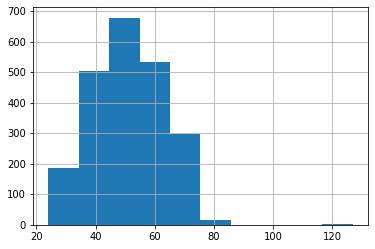

In [16]:
# Obtém a data e hora atual
data_hora_atual = datetime.datetime.now()

# Adicionar uma coluna Age no dataset com a idade do cliente.
df_full_tratado['Age'] =  data_hora_atual.year - df_full_tratado['Year_Birth'] 

# Vamos observar a Distribuição das idades para criar algumas faixas 
df_full_tratado['Age'].hist();

In [17]:
# Vamos identificar as idades "inválidas". Para este estudo vamos considerar que qualquer idade acima de 85 anos é "inválida".
df_full_tratado[df_full_tratado['Age'] > 85]

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Age
192   7829        1900  2n Cycle       Divorced  36640.0        1         0  2013-09-26       99        15          6                8                7                 4            25                  1                2                    1                  2                  5             0             0             0             0             0         1         0  120
239  11004        1893  2n Cycle         Single  60182.0        0         1  2014-05-17       23         8          0                5                7                 0             2                  1                1                    0                  2                  4             0             0             0             0             0         0         0  127
339   1150        1899       PhD       Together  83532.0        0         0  2013-09-26       36       755        144              562              104                64           224                  1                4                    6                  4                  1             0             0             1             0             0         0         0  121

In [18]:
# Vamos remover os registros com idades superior a 85 anos.
df_full_tratado = df_full_tratado[df_full_tratado['Age'] <= 85]
df_full_tratado.shape

(2213, 28)

In [19]:
# Vamos adicionar uma coluna de faixas etárias
df_full_tratado['Age_Group'] = np.where(df_full_tratado.Age<30,        '20-29', 
         np.where((df_full_tratado.Age>29) & (df_full_tratado.Age<39) ,'30-39', 
         np.where((df_full_tratado.Age>39) & (df_full_tratado.Age<49) ,'40-59',          
         np.where((df_full_tratado.Age>49) & (df_full_tratado.Age<59) ,'50-59',                            
         np.where((df_full_tratado.Age>59) & (df_full_tratado.Age<69) ,'60-69',               
                                                       '>69')))))

# Adciona a coluna criada a lista de atributos categóricos.
atributos_categoricos.append('Age_Group')

df_full_tratado.shape

(2213, 29)

## Análise dos atributos Categóricos
- Nessa etapa vamos realizar alguma análises e tramtamento dos atributos Categóricos

In [20]:
# Cria o método para ajudar a analisar os atributos categóricos do dataframe.
# Isso vai nos ajudar a observar como está a correlação dos atributos com o atributo alvo (target), além de observar quais atributos podemos unir ou descartar, por exemplo.
def desc_atributos_categoricos(df, atributos_categ, atributo_target, perc_obs_min):
    col_agg = []
    total_linhas = list(df.shape)[0]
    dfm = None       
    
    for atrib in atributos_categ:
        col_agg.append(df.groupby([atrib]).agg({atributo_target : ['count', 'mean', 'std']})) 
        dfm = pd.concat(col_agg, keys=atributos_categ)           
        perc_obs = dfm.iloc[:,0]/total_linhas
        dfm = pd.DataFrame({'Observações' : dfm.iloc[:,0], 
                            'Capacidade de Discriminação' : dfm.iloc[:,1],
                            'Desvio Padrão': dfm.iloc[:,2],  
                            '% Observações' : perc_obs , 
                            '% Obs Maior que {0}%?'.format(str(round(perc_obs_min*100))): perc_obs > perc_obs_min} 
                          )  

    return dfm

In [21]:
# Vamos exibir uma tabela da distribuição dos atributos em relação ao atributo alvo (target).
# Também vamos definir que o número mínimo de observações que cada atributo deve ser no mínimo 2% (valor empírico).
df_info_categ= desc_atributos_categoricos(df_full_tratado, atributos_categoricos, "Response", 0.02)

In [22]:
# Vamos aplicar um formatação para facilitar a visualização.
# O código abaixo destaca os atributos com a Capacidade de Discriminação inferior a 15% e número de observações menor que 2% (valores empíricos).
df_info_categ.style.applymap(lambda x: 'background-color: bisque' if x < 0.15 else 'None', subset=['Capacidade de Discriminação'])\
                   .applymap(lambda x: 'background-color: bisque' if x < 0.02 else 'None' , subset=['% Observações', '% Obs Maior que 2%?'])


# Nessa visualização podemos observar algumas coisas interessantes:
# 1 - Não temos nenhum atributo que se destaque em relação aos outros pela alta Capacidade de Discriminação nem pelo % Observações;
# 2 - Podemos observar que temos alguns atributos com Capacidade de Discriminação e % Observações muito baixos;
# 3 - Também que podemos identificar alguns atributos que podem ser agrupados, aumentando assim a Capacidade de Discriminação e o % Observações

In [23]:
# Vamos agrupar os atributos Teenhome e Kidhome em um novo
df_full_tratado['NumOffSprings'] = df_full['Kidhome'] +  df_full['Teenhome']

df_full_tratado['NumOffSprings'] = df_full_tratado['NumOffSprings'].astype('category')

atributos_categoricos.append('NumOffSprings')

In [24]:
# Exibe os registros com Marital_Status que podem ser ruídos e não vamos utilizar.
df_full_tratado[(df_full_tratado['Marital_Status'] == 'Absurd') | (df_full_tratado['Marital_Status'] == 'YOLO')]

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Age Age_Group NumOffSprings
2093   7734        1993  Graduation         Absurd  79244.0        0         0  2012-12-19       58       471        102              125              212                61           245                  1                4                   10                  7                  1             0             0             1             1             0         0         1   27     20-29             0
2134   4369        1957      Master         Absurd  65487.0        0         0  2014-01-10       48       240         67              500              199                 0           163                  3                3                    5                  6                  2             0             0             0             0             0         0         0   63     60-69             0
2177    492        1973         PhD           YOLO  48432.0        0         1  2012-10-18        3       322          3               50                4                 3            42                  5                7                    1                  6                  8             0             0             0             0             0         0         0   47     40-59             1
2202  11133        1973         PhD           YOLO  48432.0        0         1  2012-10-18        3       322          3               50                4                 3            42                  5                7                    1                  6                  8             0             0             0             0             0         0         1   47     40-59             1

In [25]:
# Vamos remover os registros com estes Marital_Status incomuns
df_full_tratado = df_full_tratado[(df_full_tratado['Marital_Status'] != 'Absurd') | (df_full_tratado['Marital_Status'] != 'YOLO')]
df_full_tratado.shape

(2213, 30)

In [26]:
# Vamos criar um dataframe transformando os valores categóricos em valores inteiros para observar a correlação.
df_categ_code = pd.DataFrame()

# Vamos Converter os atributos catgóricos para o tipo category e codificar eles.
for c in atributos_categoricos:
    df_categ_code[c] = df_full_tratado[c].astype('category')  
    df_categ_code[c] =  df_categ_code[c].cat.codes  
    

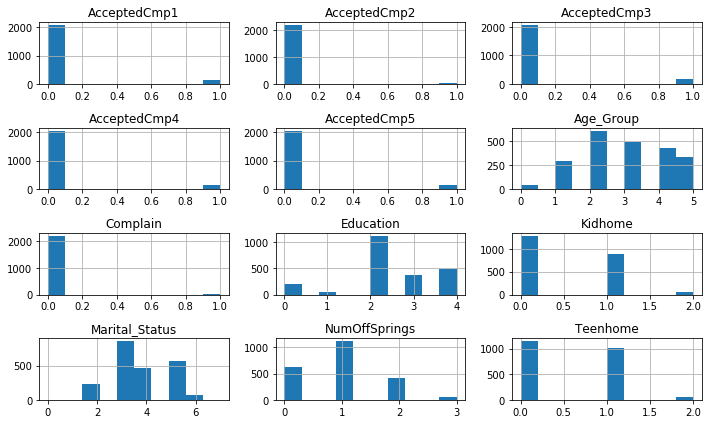

In [27]:
# Distribuição dos atributos catégoricos do dataset
df_categ_code.hist(figsize=(10,6))
plt.tight_layout()
plt.show()

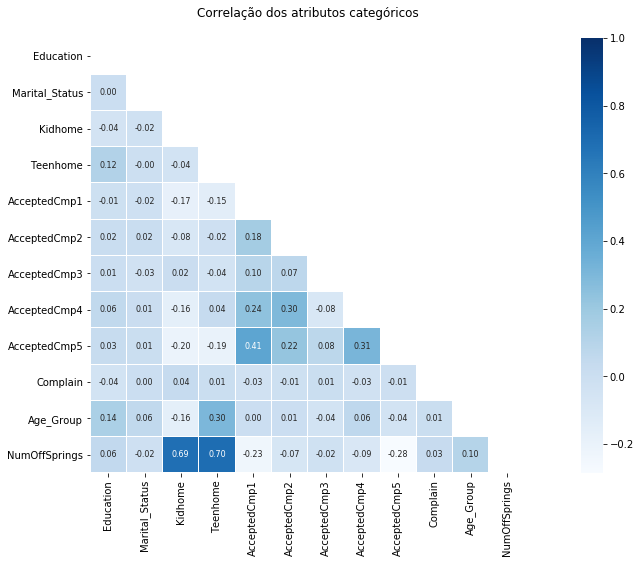

In [28]:
# Plota o gráfico de correlação dos dados categóricos.
df_categ_corr = df_categ_code.astype(float).corr()

plt.figure(figsize=(20,8))
mask = np.triu(np.ones_like(df_categ_corr, dtype=np.bool))
ax1 = sns.heatmap(df_categ_corr,linewidths=0.1,vmax=1.0, square=True, annot=True, fmt='.2f', annot_kws={"size": 8} , cmap=matplotlib.cm.Blues, mask=mask)
plt.title('Correlação dos atributos categóricos\n')
plt.show()

In [29]:
# Adiciona o atributo Target ao dataframe dos valores categóricos codificados
df_categ_code["Response"] = df_full_tratado["Response"]

In [30]:
# Cria uma função para plotar graficos do tipo Violino.
def plota_grafico_violino(df, atributos, atributo_target, titulo_grafico,  total_colunas = 5, altura =10, largura =20):
        
    atributos_cop = atributos.copy()
    
    if(atributo_target in atributos_cop): 
        atributos_cop.remove(atributo_target)        
    
    total_plots = len(atributos_cop)
    total_linhas= total_plots//total_colunas + 1  
    
    fig, axes = plt.subplots(total_linhas, total_colunas, figsize=(largura, altura))
    
    fig.subplots_adjust(hspace=0.3, wspace=0.4)
    sns.set_style("whitegrid")    

    for i, atributo in enumerate(atributos_cop):
        linha = i// total_colunas
        coluna = i % total_colunas

        sns.violinplot(data = df, y = atributo, x = atributo_target, ax=axes[linha, coluna])
    
    plots_restantes = total_linhas * total_colunas - total_plots
   
    for i in range(1,plots_restantes+1):
        axes.flat[-i].set_visible(False) 
        
    fig.suptitle(titulo_grafico,  y=0.95, fontsize=14, fontweight='bold')


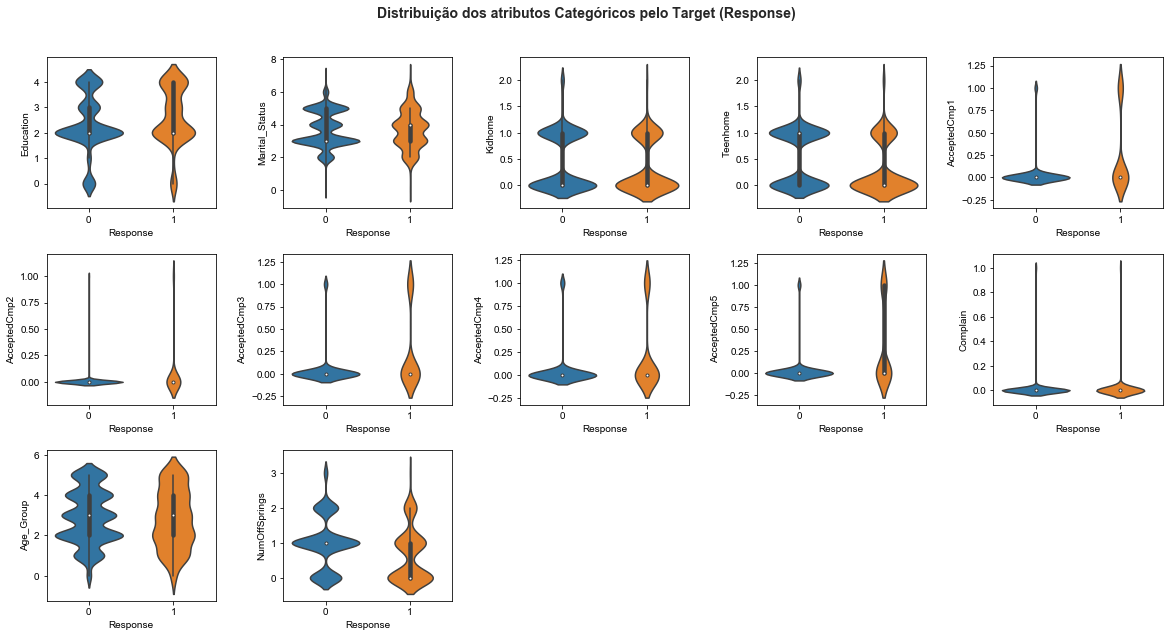

In [31]:
# Plota a distribuição dos atributos Categóricos (codificados) pelo atributo Target (Response)
plota_grafico_violino(df_categ_code, atributos_categoricos, "Response", 'Distribuição dos atributos Categóricos pelo Target (Response)')

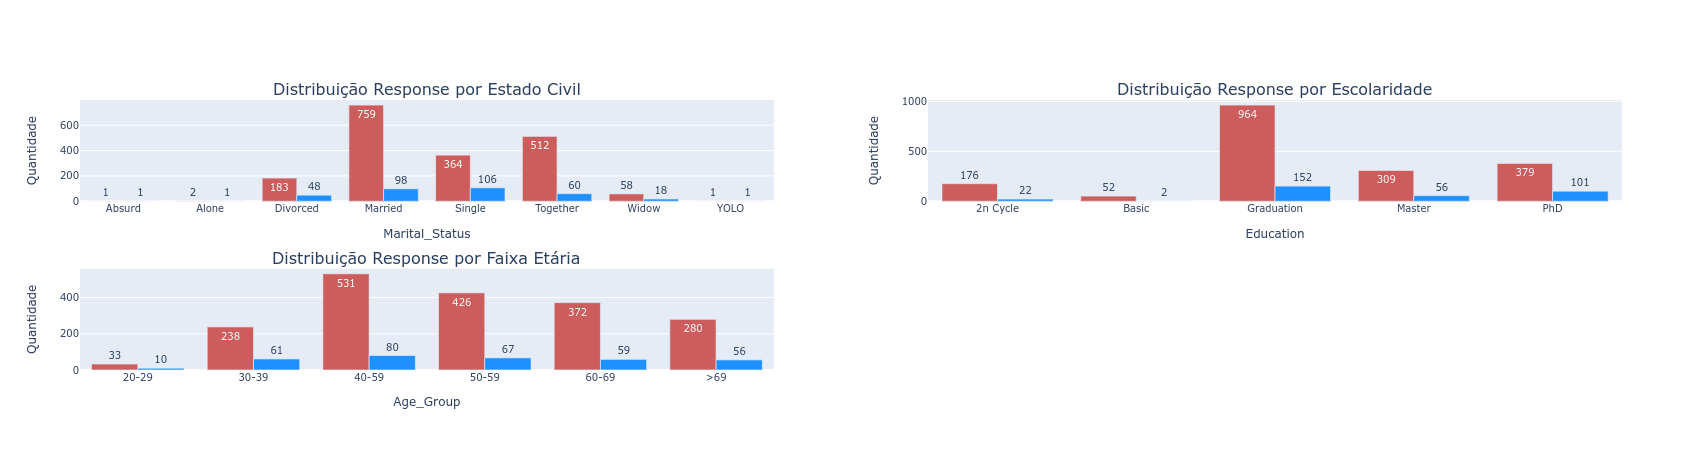

In [32]:
# Plota alguns graficos de barras com a ditribução de alguns atributos em relação ao target.
atributos_categoria_plot = ['Marital_Status', 'Education', 'Age_Group']
df = df_full_tratado
traces = []

linhas_plot = 2
colunas_plot = 2 
fig = make_subplots(rows=linhas_plot, cols=colunas_plot,  vertical_spacing = 0.25, subplot_titles=('Distribuição Response por Estado Civil', 'Distribuição Response por Escolaridade', 'Distribuição Response por Faixa Etária'))

for atributo in atributos_categoria_plot:
    dados =          df.groupby([atributo, 'Response'], as_index = False).agg({'ID': 'count'})
    categoria =      dados[atributo].unique()
    dados_classe_0 = dados[dados.Response == 0]['ID']
    dados_classe_1 = dados[dados.Response == 1]['ID']
    
    traces.append( go.Bar(x=categoria, y=dados_classe_0,  name='Response 0',  showlegend=False, text=dados_classe_0 , textposition = 'auto', marker_color='indianred' ))
    traces.append( go.Bar(x=categoria, y=dados_classe_1,  name='Response 1',  showlegend=False, text=dados_classe_1 , textposition = 'auto', marker_color='dodgerblue' ))

count = 0     

for i, atributo in enumerate(atributos_categoria_plot):
    linha = (i// colunas_plot) +1  
    coluna = (i % colunas_plot)+1
    
    fig.append_trace(traces[count], row=linha, col=coluna)     
    fig.append_trace(traces[count+1], row=linha, col=coluna)   
    fig.update_xaxes(row=linha, col=coluna, title_text=atributos_categoria_plot[i])
    
    count += 2
 
fig.update_yaxes(title_text='Quantidade')
fig.update_layout(font=dict( size=10))
        
fig.show()

### Análise dos atributos Numéricos

In [33]:
# Plota as variáveis numéricas.
atributos_numericos

['Income',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth']

In [34]:
# Observando algumas medidas
df_full_tratado[atributos_numericos].describe().transpose()

count          mean           std     min      25%      50%      75%       max
Income               2213.0  52236.581563  25178.603047  1730.0  35246.0  51373.0  68487.0  666666.0
Recency              2213.0     49.007682     28.941864     0.0     24.0     49.0     74.0      99.0
MntWines             2213.0    305.153638    337.305490     0.0     24.0    175.0    505.0    1493.0
MntFruits            2213.0     26.323995     39.735932     0.0      2.0      8.0     33.0     199.0
MntMeatProducts      2213.0    166.962494    224.226178     0.0     16.0     68.0    232.0    1725.0
MntFishProducts      2213.0     37.635337     54.763278     0.0      3.0     12.0     50.0     259.0
MntSweetProducts     2213.0     27.034794     41.085433     0.0      1.0      8.0     33.0     262.0
MntGoldProds         2213.0     43.911432     51.699746     0.0      9.0     24.0     56.0     321.0
NumDealsPurchases    2213.0      2.325350      1.924402     0.0      1.0      2.0      3.0      15.0
NumWebPurchases      2213.0      4.087664      2.741664     0.0      2.0      4.0      6.0      27.0
NumCatalogPurchases  2213.0      2.671487      2.927096     0.0      0.0      2.0      4.0      28.0
NumStorePurchases    2213.0      5.805242      3.250752     0.0      3.0      5.0      8.0      13.0
NumWebVisitsMonth    2213.0      5.321735      2.425092     0.0      3.0      6.0      7.0      20.0

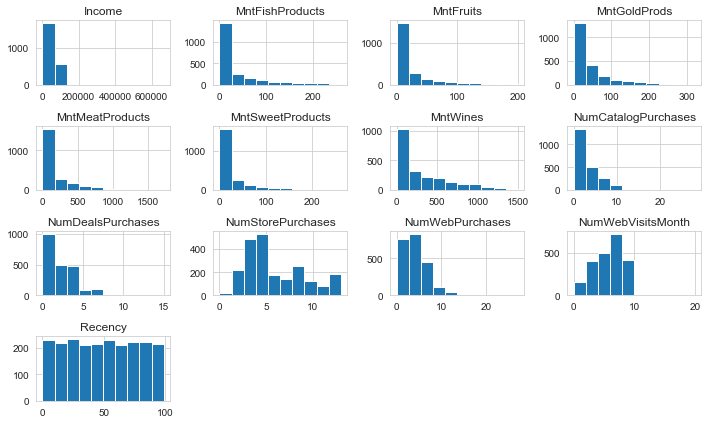

In [35]:
# Distribuição dos atributos numéricos do dataset
df_full_tratado[atributos_numericos].hist(figsize=(10,6))
plt.tight_layout()
plt.show()

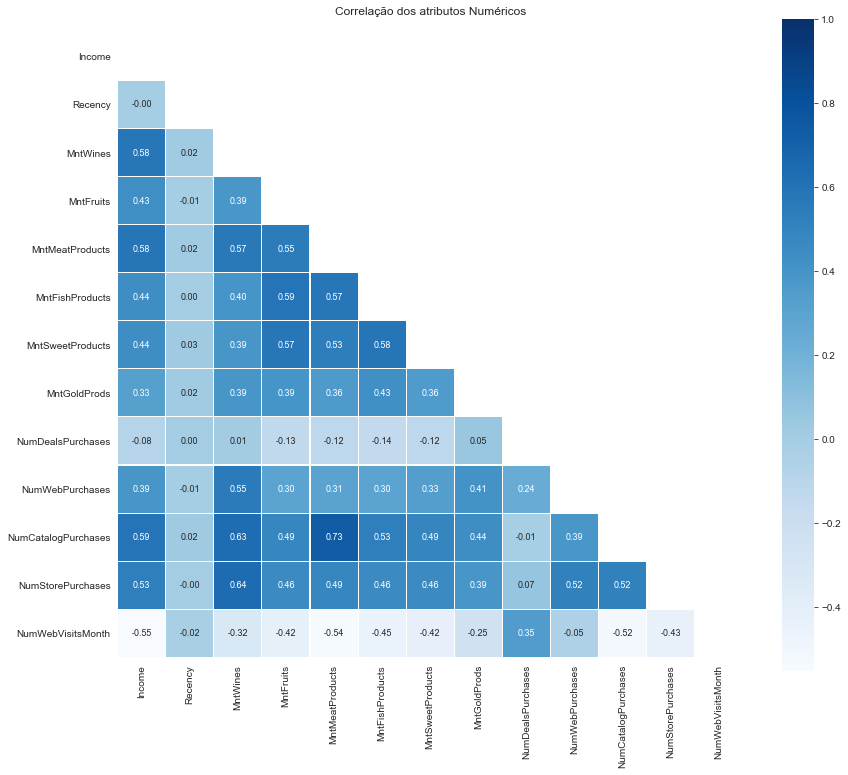

In [36]:
# Plota o gráfico de correlação dos dados Numéricos.
df_num_corr = df_full_tratado[atributos_numericos].corr()

plt.figure(figsize=(14,12))
mask = np.triu(np.ones_like(df_num_corr, dtype=np.bool))
ax1 = sns.heatmap(df_num_corr,linewidths=0.1,vmax=1, square=True, annot=True, fmt='.2f', annot_kws={"size": 9} , cmap=matplotlib.cm.Blues, mask=mask)
plt.title('Correlação dos atributos Numéricos\n')
plt.show()

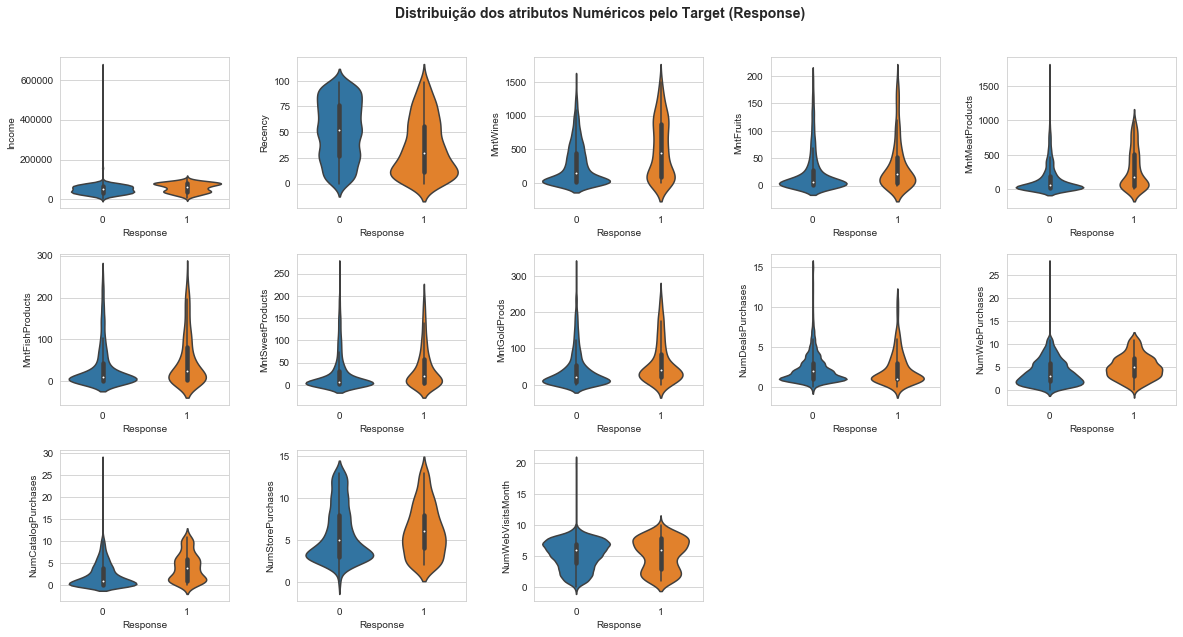

In [37]:
# Plota a distribuição dos atributos Numéricos pelo atributo Target (Response)
plota_grafico_violino(df_full_tratado, atributos_numericos, "Response", 'Distribuição dos atributos Numéricos pelo Target (Response)')

### Verificando e Tratando Outliers
- Nesta etapa vamos verificar e tratar os outliers (outliers são valores que se distanciam muito da média).
- O tratamento de outliers é uma das etapas mais importantes, pois se não for feita corretamente podemos deixar nosso modelo enviesado.
- Existem diversas maneiras para tratar os outliers, por exemplo: excluir, preencher com a média, tratar separado, transformação logarítmica, utilizar métodos de clusterização e etc.
- É importante destacar que nem todo valor indentificado como oulier é um registro errado, o valor poder ser correto. Mas como ele difere muito da média, a gente precisa tratar para evitar distorções no modelo.

In [38]:
df_full_tratado.shape

(2213, 30)

In [39]:
# Define a Função para plotar graficos BoxPlot
def plota_graficos_boxplot(df, lista_atributos, linhas_plot = 5, colunas_plot = 3):
    traces = []

    fig = make_subplots(rows=linhas_plot, cols=colunas_plot)

    for atributo in lista_atributos:
        traces.append(go.Box(y=df[atributo] , name = atributo))  
 
    count = 0
    for i, atributo in enumerate(lista_atributos):
        linha = (i// colunas_plot) +1  
        coluna = (i % colunas_plot)+1
    
        fig.append_trace(traces[count], row=linha, col=coluna)  
        count +=1      

    fig.update_layout(title = "Distribuição das Variáveis Numéricas - Verificação de Outliers", title_x=0.5, font=dict( size=10), showlegend = False, height = 1200 )

    fig.show()

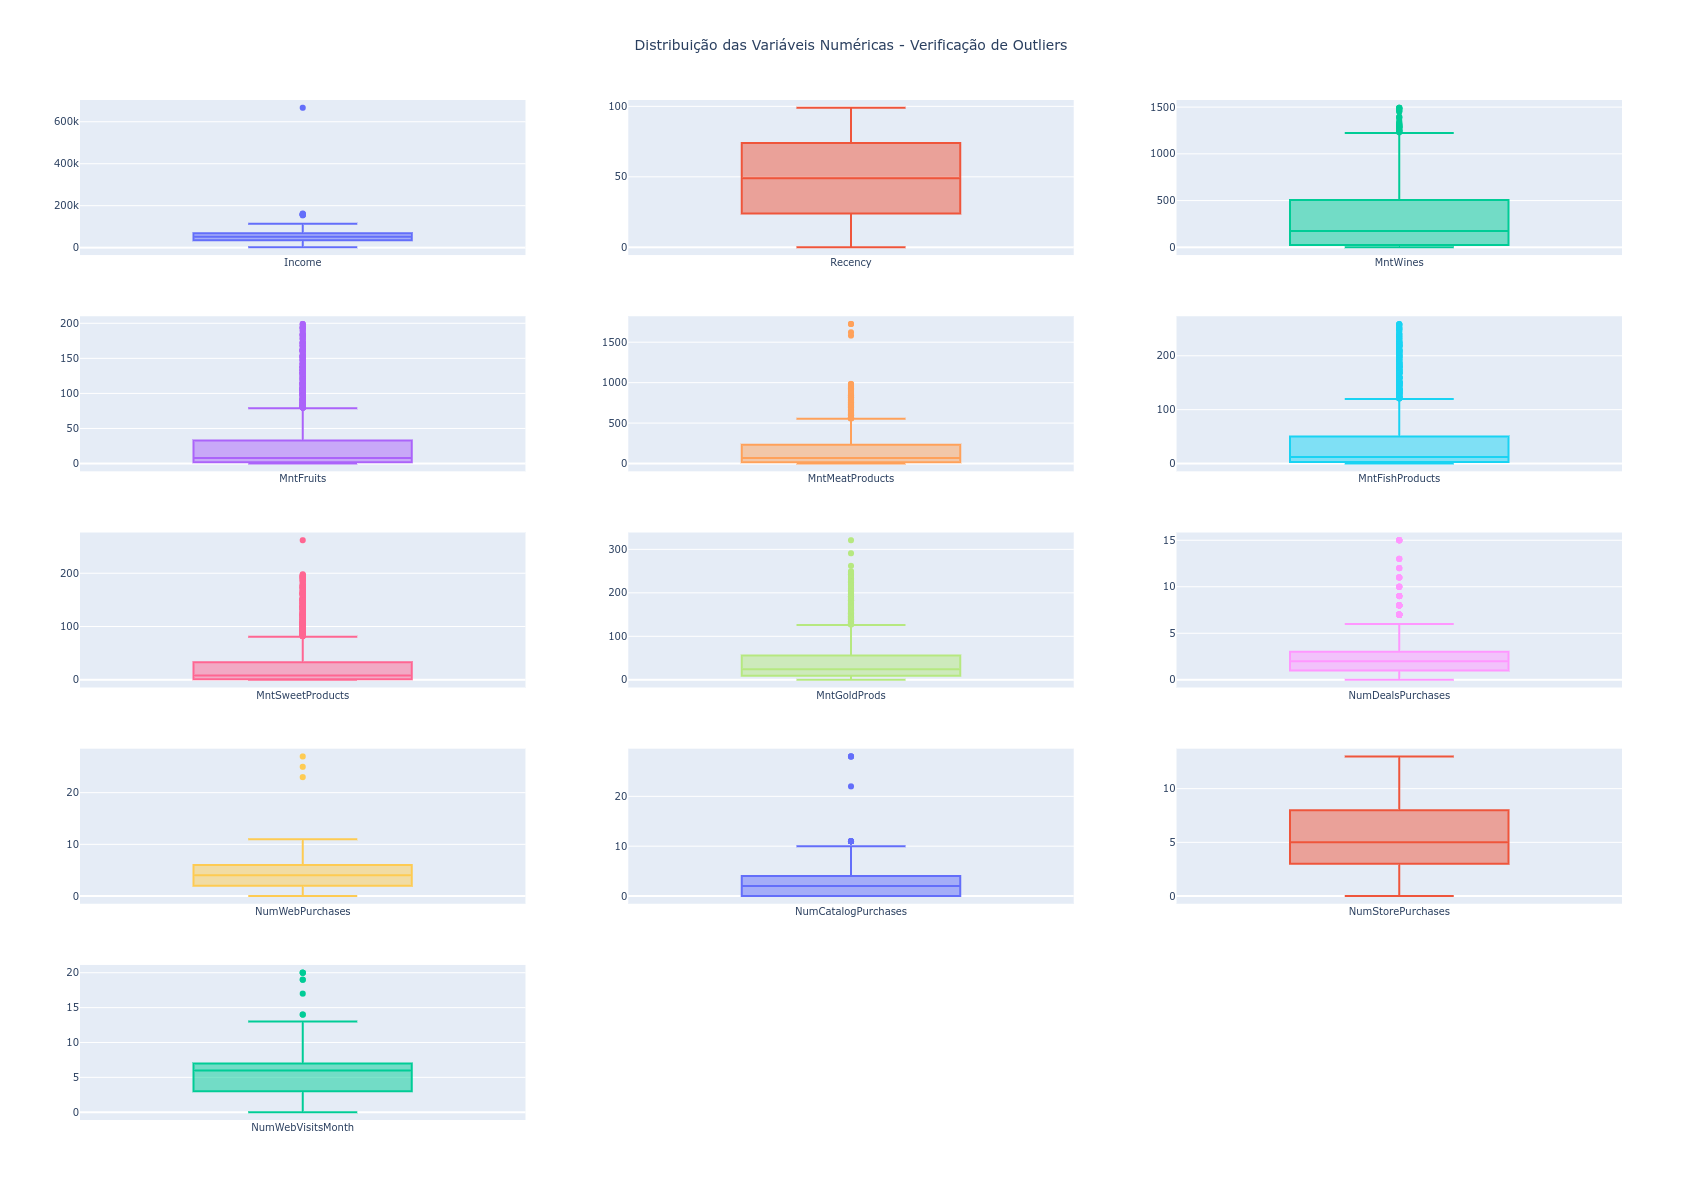

In [40]:
# Vamos plotar os dados dos atributos numéricos indenticar outliers
plota_graficos_boxplot(df_full_tratado, atributos_numericos)

In [41]:
# Para a identificação de outlier vamos utilizar a biblioteca PyOD.
# PyOD é uma biblioteca que combina várias técnicas para detecção de outlier em dados multivariados.
# https://pyod.readthedocs.io/en/latest/index.html

# Para o nosso estudo vamos usar o KNN detector
from pyod.models.knn import KNN  

In [42]:
# Aqui criamos e ajustamos o detector aos nossos dados.
detector_outlier = KNN()
detector_outlier.fit(df_full_tratado[atributos_numericos])

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [43]:
# Vamos coletar algumas informações sobre o resultado da detecção.
previsoes_outlier = detector_outlier.labels_ # Indica se o registro é outlier (1) ou não (0).
confianca_outlier = detector_outlier.decision_scores_ # Quanto mais alto o valor, mais anormal é o dados.
limite_outlier = detector_outlier.threshold_ # Define o valor limite para o dado não ser considerado um outlier (comparado com o decision_scores_)

In [44]:
# Cria um dataframe com a identificação de outlier no registro
df_outliers_detected = df_full_tratado.copy()

In [45]:
# Vamos adicionar as informações da detecção ao nosso dataframe.
df_outliers_detected['IsOutlier'] = previsoes_outlier
df_outliers_detected['OutlierConfidence'] = confianca_outlier
df_outliers_detected['OutlierConfidenceThreshold'] = confianca_outlier

In [46]:
# Salva do Dataframe em CSV
#df_outliers_detected.to_csv('df_outliers_detected.csv', index=False, sep=';', encoding='utf-8-sig')

In [47]:
# Lista somente os regitros marcados como outlier
df_full_tratado[df_outliers_detected['IsOutlier'] == 1].shape

(222, 30)

In [48]:
# Existem diversas maneiras de tratamento de outliers, por exemplo: excluir, preencher com a média, tratar separado, transformação logaritmica, utilizar métodos de clusterização e etc..
# Neste estudo vamos remover os registros marcados como outlier.
df_full_tratado = df_full_tratado[df_outliers_detected['IsOutlier'] == 0].copy()
df_full_tratado.shape

(1991, 30)

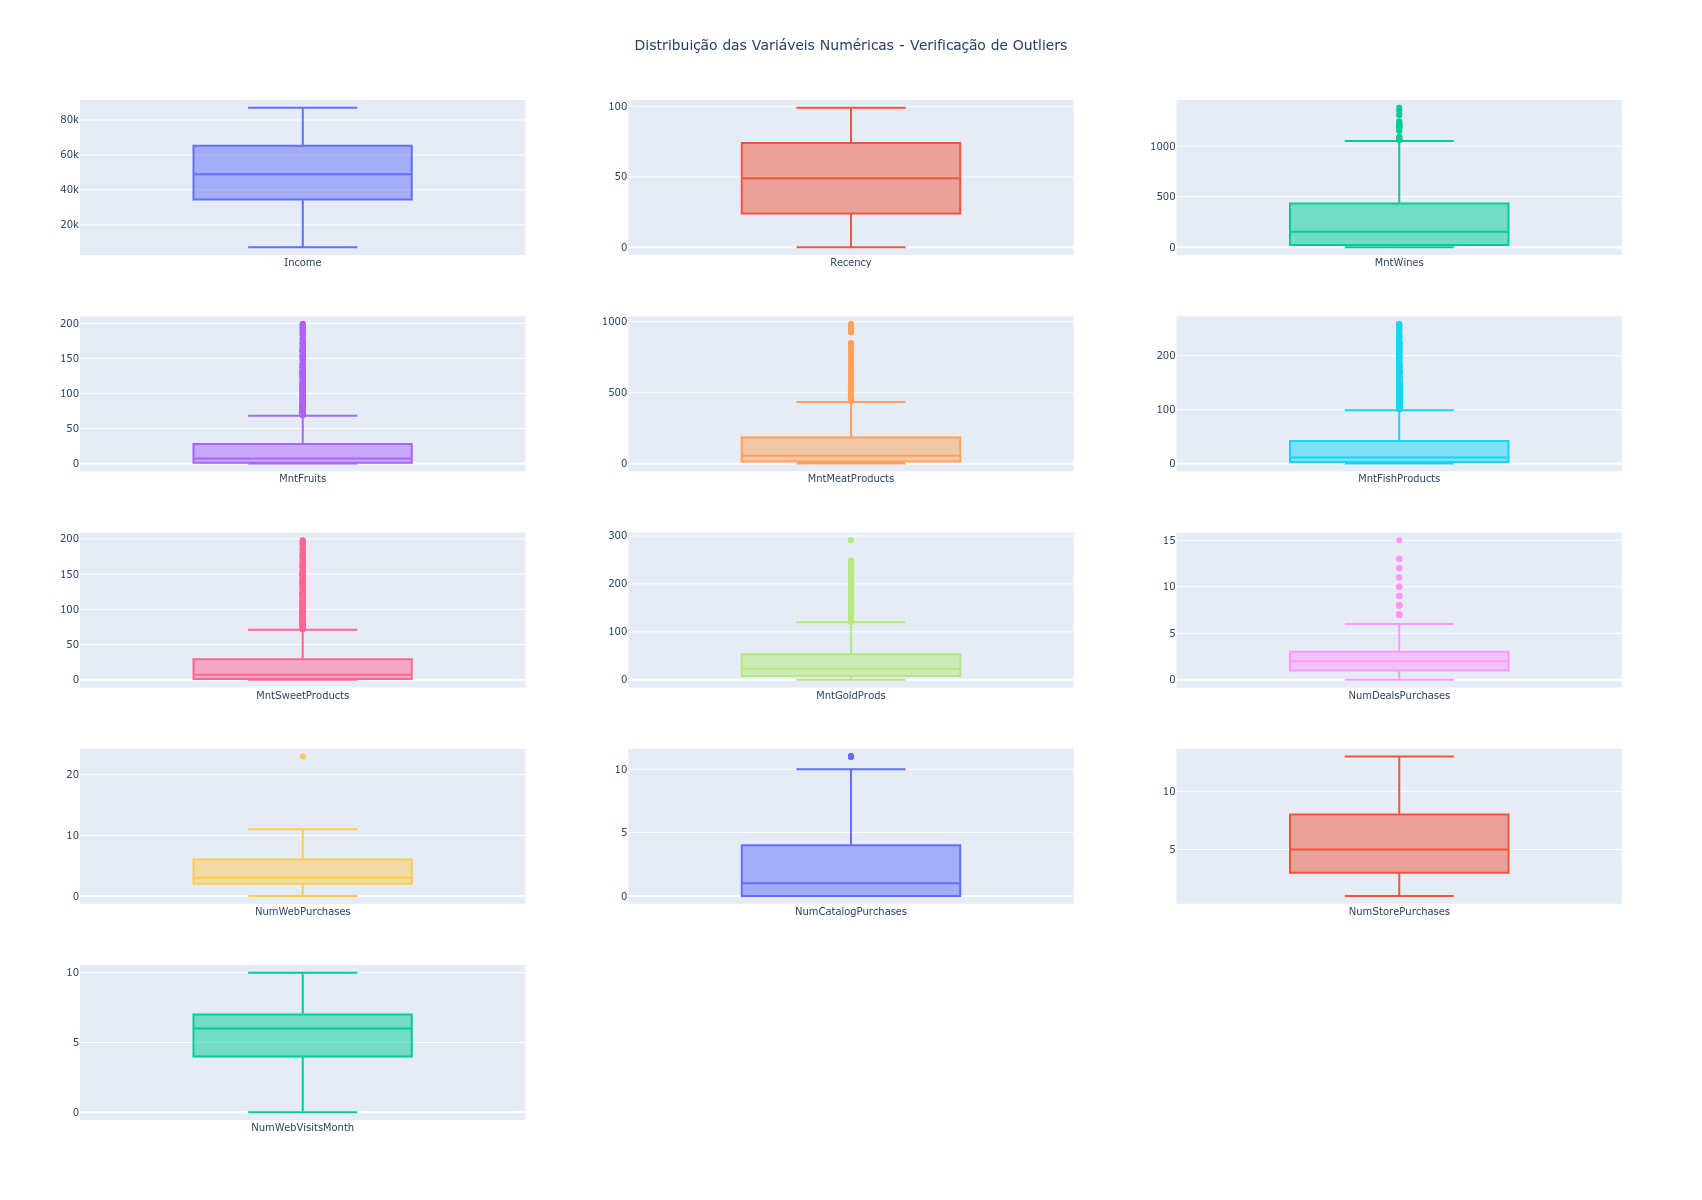

In [49]:
# Vamos plotar os dados apóas o tratamento dos Outliers.
plota_graficos_boxplot(df_full_tratado, atributos_numericos)

### Adicionado algumas colunas calculadas ao dataframe
- Nesta etapa vamos criar alguns atributos derivados para nos ajudar em algumas análises.

In [50]:
# Soma o valor gasto com todos os tipos de produto.
df_full_tratado.loc[:, 'MntTotal'] = df_full_tratado['MntWines'] + df_full_tratado['MntFruits']  +  df_full_tratado['MntMeatProducts']  +  df_full_tratado['MntFishProducts']  +  df_full_tratado['MntSweetProducts']  +  df_full_tratado['MntGoldProds']  

In [51]:
# Soma a quantidade de todos os tipos de produtos.
df_full_tratado.loc[:,'NumTotal'] = df_full_tratado['NumDealsPurchases'] + df_full_tratado['NumWebPurchases']  +  df_full_tratado['NumCatalogPurchases']  +  df_full_tratado['NumStorePurchases']  

In [52]:
# Soma o total de campanhas aceitas
df_full_tratado.loc[:,'TotalAcceptedCmp'] = df_full_tratado['AcceptedCmp1'].astype(int) + df_full_tratado['AcceptedCmp2'].astype(int)  +  df_full_tratado['AcceptedCmp3'].astype(int)  +  df_full_tratado['AcceptedCmp4'].astype(int)  +  df_full_tratado['AcceptedCmp5'].astype(int) 

In [53]:
# Calcula a proporçõo de campanhas aceitas
df_full_tratado.loc[:,'Prop_AcceptedCmp'] = df_full_tratado['TotalAcceptedCmp'] / 5

In [54]:
# Calcula a proporçao dos montantes de cada tipo
cols_mnt = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts', 'MntGoldProds']

for col in cols_mnt:
    col_name= 'Prop' + col[3:len(col)]
    df_full_tratado.loc[:,col_name] = df_full_tratado[col] / df_full_tratado['MntTotal']

In [55]:
# Calcula a proporçõo das quantidades
cols_num = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases','NumStorePurchases']

for col in cols_mnt:
    col_name= 'Prop' + col[3:len(col)]
    df_full_tratado.loc[:,col_name] = df_full_tratado[col] / df_full_tratado['NumTotal']

# Análise RFM - Recência (R), Frequência (F), Monetaridade (M).

- Nesta etapa vamos realizar um breve análise RFM. 
- RFM é um método utilizado para analisar o comportamento do cliente e definir segmentos de mercado. É comumente utilizada em database marketing e marketing direto e tem recebido atenção especial no varejo (wikipedia).
- Essa técnica tem como objetivo classificar os clientes por meio de pontuações nos três principais pilares que nomeiam o método: quando foi sua última compra, quantas vezes ele já comprou e quanto já gastou com na empresa.


- Essa técnica pode nos ajudar a responder as seguintes perguntas:
  - Quais são os melhores clientes?
  - Quais clientes tem mais potencial para ser fidelizado?
  - Quais clientes tem mais chances de não comprar mais meus produtos?
  - Quais clientes possuem mais chances de responder a uma campanha de Marketing?


In [56]:
df_full_tratado.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Age Age_Group NumOffSprings  MntTotal  NumTotal  TotalAcceptedCmp  Prop_AcceptedCmp  PropWines  PropFruits  PropMeatProducts  PropFishProducts  PropSweetProducts  PropGoldProds
1  2174        1954  Graduation         Single  46344.0        1         1  2014-03-08       38        11          1                6                2                 1             6                  2                1                    1                  2                  5             0             0             0             0             0         0         0   66     60-69             2        27         6                 0               0.0   1.833333    0.166667          1.000000          0.333333           0.166667       1.000000
2  4141        1965  Graduation       Together  71613.0        0         0  2013-08-21       26       426         49              127              111                21            42                  1                8                    2                 10                  4             0             0             0             0             0         0         0   55     50-59             0       776        21                 0               0.0  20.285714    2.333333          6.047619          5.285714           1.000000       2.000000
3  6182        1984  Graduation       Together  26646.0        1         0  2014-02-10       26        11          4               20               10                 3             5                  2                2                    0                  4                  6             0             0             0             0             0         0         0   36     30-39             1        53         8                 0               0.0   1.375000    0.500000          2.500000          1.250000           0.375000       0.625000
4  5324        1981         PhD        Married  58293.0        1         0  2014-01-19       94       173         43              118               46                27            15                  5                5                    3                  6                  5             0             0             0             0             0         0         0   39       >69             1       422        19                 0               0.0   9.105263    2.263158          6.210526          2.421053           1.421053       0.789474
5  7446        1967      Master       Together  62513.0        0         1  2013-09-09       16       520         42               98                0                42            14                  2                6                    4                 10                  6             0             0             0             0             0         0         0   53     50-59             1       716        22                 0               0.0  23.636364    1.909091          4.454545          0.000000           1.909091       0.636364

In [57]:
# Cria o dataframe RFM - Recência (R), Frequência (F), Monetaridade (M).
df_RFM = pd.DataFrame()
df_RFM ['ID']  = df_full_tratado['ID']
df_RFM ['Recency']  = df_full_tratado['Recency']
df_RFM ['Frequency']= df_full_tratado['NumTotal']
df_RFM ['Monetary'] = df_full_tratado['MntTotal']


Distribuição das varíaveis RFM - Recência (R), Frequência (F), Monetaridade (M).


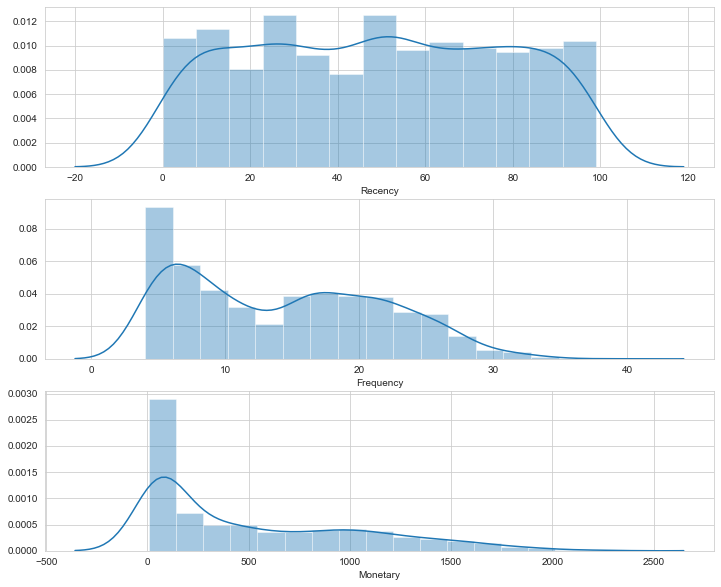

In [58]:
#  Distribuição das variáveis RFM - Recência (R), Frequência (F), Monetaridade (M).
print('\nDistribuição das varíaveis RFM - Recência (R), Frequência (F), Monetaridade (M).')
plt.figure(figsize=(12,10))
plt.subplot(3, 1, 1); sns.distplot(df_RFM['Recency'])
plt.subplot(3, 1, 2); sns.distplot(df_RFM['Frequency'])
plt.subplot(3, 1, 3); sns.distplot(df_RFM['Monetary'])

plt.show()

In [59]:
# Criando os quintis onde cada um contém 20% dos registros (população).
quintis = df_RFM[['Recency', 'Frequency', 'Monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintis

{'Recency': {0.2: 19.0, 0.4: 39.0, 0.6: 58.0, 0.8: 79.0},
 'Frequency': {0.2: 7.0, 0.4: 11.0, 0.6: 17.0, 0.8: 22.0},
 'Monetary': {0.2: 54.0, 0.4: 156.0, 0.6: 497.0, 0.8: 1029.0}}

In [60]:
# Cria o método para atribuir uma classificação a recência de 1 a 5 (Quanto menor melhor).
def r_score(x):
    if x <= quintis['Recency'][.2]:
        return 5
    elif x <= quintis['Recency'][.4]:
        return 4
    elif x <= quintis['Recency'][.6]:
        return 3
    elif x <= quintis['Recency'][.8]:
        return 2
    else:
        return 1
    
# Cria o método para atribuir uma classificação a Frequência e Monetaridade de 1 a 5 (Quanto maior melhor).
def fm_score(x, c):
    if x <= quintis[c][.2]:
        return 1
    elif x <= quintis[c][.4]:
        return 2
    elif x <= quintis[c][.6]:
        return 3
    elif x <= quintis[c][.8]:
        return 4
    else:
        return 5    
    
#  Cria o método para calcular o score RFM final. Vamos atribuir peso 3 a Recência (R) e 1.5 a Frequência 
def rfm_score(df):
    return (df.R * 3) + (((df.F * 1.5) + df.M) / 2 )
    

In [61]:
# Calcula os Scores do RFM e adiciona no dataframe
df_RFM['R'] = df_RFM['Recency'].apply(lambda x: r_score(x))
df_RFM['F'] = df_RFM['Frequency'].apply(lambda x: fm_score(x, 'Frequency'))
df_RFM['M'] = df_RFM['Monetary'].apply(lambda x: fm_score(x, 'Monetary'))
df_RFM['RFM_Concat'] = df_RFM['R'].map(str) + df_RFM['F'].map(str) + df_RFM['M'].map(str)
df_RFM['RFM_Score'] = df_RFM.apply(rfm_score, axis=1)

df_RFM.head()

ID  Recency  Frequency  Monetary  R  F  M RFM_Concat  RFM_Score
1  2174       38          6        27  4  1  1        411      13.25
2  4141       26         21       776  4  4  4        444      17.00
3  6182       26          8        53  4  2  1        421      14.00
4  5324       94         19       422  1  4  3        143       7.50
5  7446       16         22       716  5  4  4        544      20.00

### Definir as Categorias (Segmentos) RFM

Na análise RFM há diferentes tipos de segmentação. Neste estudo vamos utilizar onze segmentos já bastante conhecidos na literatura. 
A terminologia aqui utilizada é uma tradução livre do inglês. (https://blog.analystats.com/pt/2019/03/21/segmenta%C3%A7%C3%A3o-de-clientes-uma-an%C3%A1lise-rfm-em-knime/)

Abaixo estão os segmentos de RFM e seu significado que definimos para essa análise.



- 1	-	Campeões	-	Compraram recentemente, compram com frequência e gastam muito
-	2	-	Fiéis	-	Gastam muito e respondem a promoções
-	3	-	Potencialmente fiéis	-	Compraram recentemente, mais de uma vez e gastaram uma boa quantia
-	4	-	Novos clientes	-	Compraram recentemente, mas não compram com frequência
-	5	-	Promissores	-	Compraram recentemente, mas não gastaram muito
-	6	-	Precisam de atenção	-	Recência, frequência e valor monetário acima da média
-	7	-	Quase em risco	-	Recência, frequência e valor monetário abaixo da média
-	8	-	Em risco	-	Gastaram muito, compraram muitas vezes, mas há muito tempo
-	9	-	Não posso perdê-los	-	Compraram muito e com frequência, mas há muito tempo
-	10	-	Hibernando	-	Compraram pouco, com baixa frequência e há muito tempo
-	11	-	Perdidos	-	Recência, frequência e valores monetários baixos


In [62]:
# Cria o método para atribuir o RFM_Score um segmento.
def rfm_level(df):
    
    if df.RFM_Score > 15.5:
        return  'Campeões'  
    
    elif df.RFM_Score > 14.5 and df.RFM_Score <= 15.5:
        return 'Fiéis'
    
    elif df.RFM_Score > 14.125 and df.RFM_Score <= 14.5:
        return 'Potencialmente fiéis'
 
    elif df.RFM_Score > 11.125 and df.RFM_Score <= 14.125:
        return 'Novos clientes'
    
    elif df.RFM_Score > 10.625 and df.RFM_Score <= 11.125:
        return 'Promissores'
    
    elif df.RFM_Score > 8.75 and df.RFM_Score <= 10.625:
        return 'Precisam de atenção'
    
    elif df.RFM_Score > 7.375 and df.RFM_Score <= 8.75:
        return 'Quase em risco'

    elif df.RFM_Score > 7.125 and df.RFM_Score <= 7.375 :
        return 'Em Risco'
    
    elif df.RFM_Score > 6.375 and df.RFM_Score <= 7.125:
        return 'Não posso perdê-los'
    
    elif df.RFM_Score > 4.25 and df.RFM_Score <= 6.375:
        return 'Hibernando'   
    
    else:
        return 'Perdidos'

In [63]:
# Cria a coluna de segmento RFM no dataframe
df_RFM['RFM_Segment'] = df_RFM.apply(rfm_level, axis=1)

In [64]:
# Salva do Dataframe em CSV
#df_RFM.to_csv('df_RFM.csv', index=False, sep=';', encoding='utf-8-sig')

In [65]:
# Exibe os 10 melhores clientes de acordo com RFM
print('Top 10 melhores clientes de acordo com RFM')
df_RFM.sort_values(by = ['RFM_Score','Monetary'] , ascending=False).head(10)

Top 10 melhores clientes de acordo com RFM


ID  Recency  Frequency  Monetary  R  F  M RFM_Concat  RFM_Score RFM_Segment
1153   5031       14         26      1833  5  5  5        555      21.25    Campeões
209     380       17         29      1804  5  5  5        555      21.25    Campeões
51     4114        2         29      1693  5  5  5        555      21.25    Campeões
1066   3005        7         23      1650  5  5  5        555      21.25    Campeões
1320   1650       13         27      1643  5  5  5        555      21.25    Campeões
188    6982       14         24      1581  5  5  5        555      21.25    Campeões
2087   6343        6         23      1518  5  5  5        555      21.25    Campeões
412    7030        1         35      1485  5  5  5        555      21.25    Campeões
1498   9463       16         25      1443  5  5  5        555      21.25    Campeões
1743  10814        6         25      1376  5  5  5        555      21.25    Campeões

In [66]:
# Exibe os 10 piores clientes de acordo com RFM
print('Top 10 piores clientes de acordo com RFM')
df_RFM.sort_values(by = ['RFM_Score','Monetary'] , ascending=True).head(10)

Top 10 piores clientes de acordo com RFM


ID  Recency  Frequency  Monetary  R  F  M RFM_Concat  RFM_Score RFM_Segment
178   10492       96          4        10  1  1  1        111       4.25    Perdidos
867    4259       80          4        10  1  1  1        111       4.25    Perdidos
1720   6742       82          4        11  1  1  1        111       4.25    Perdidos
1851  11148       85          4        13  1  1  1        111       4.25    Perdidos
862    9553       94          4        15  1  1  1        111       4.25    Perdidos
1083   9523       95          4        15  1  1  1        111       4.25    Perdidos
1131    606       87          4        15  1  1  1        111       4.25    Perdidos
1293   7128       91          4        15  1  1  1        111       4.25    Perdidos
1396   8663       85          4        15  1  1  1        111       4.25    Perdidos
349   11030       90          4        16  1  1  1        111       4.25    Perdidos

In [67]:
# Agrupando os Segmentos RFM pela média e quantidade.
df_RFM_Segment_AGG = df_RFM.groupby('RFM_Segment').agg({'Recency': 'mean','Frequency': 'mean', 'Monetary': ['mean', 'count'], 'RFM_Score': 'max'}).round(2)
df_RFM_Segment_AGG

Recency Frequency Monetary       RFM_Score
                        mean      mean     mean count       max
RFM_Segment                                                    
Campeões               16.36     16.24   623.23   633     21.25
Em Risco               72.59      6.76   149.49    80      7.25
Fiéis                  46.47     23.40   987.22    86     15.50
Hibernando             89.50      8.43    99.12   105      6.25
Novos clientes         48.36     14.26   513.03   369     14.00
Não posso perdê-los    90.17     14.33   314.92    52      6.75
Perdidos               88.28      5.22    33.29    69      4.25
Potencialmente fiéis   37.86     13.81   635.11    85     14.50
Precisam de atenção    65.14     13.20   446.10   218     10.50
Promissores            60.34     13.92   591.56    99     11.00
Quase em risco         81.10     15.67   588.62   195      8.75

In [68]:
#Prepara o dataframe para melhor exibição
df_RFM_Segment_AGG.columns = df_RFM_Segment_AGG.columns.droplevel()
df_RFM_Segment_AGG.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count', 'RFM_Score']
df_RFM_Segment_AGG.reset_index(inplace=True)
df_RFM_Segment_AGG.sort_values(by = 'RFM_Score', inplace=True)
df_RFM_Segment_AGG

RFM_Segment  RecencyMean  FrequencyMean  MonetaryMean  Count  RFM_Score
6               Perdidos        88.28           5.22         33.29     69       4.25
3             Hibernando        89.50           8.43         99.12    105       6.25
5    Não posso perdê-los        90.17          14.33        314.92     52       6.75
1               Em Risco        72.59           6.76        149.49     80       7.25
10        Quase em risco        81.10          15.67        588.62    195       8.75
8    Precisam de atenção        65.14          13.20        446.10    218      10.50
9            Promissores        60.34          13.92        591.56     99      11.00
4         Novos clientes        48.36          14.26        513.03    369      14.00
7   Potencialmente fiéis        37.86          13.81        635.11     85      14.50
2                  Fiéis        46.47          23.40        987.22     86      15.50
0               Campeões        16.36          16.24        623.23    633      21.25

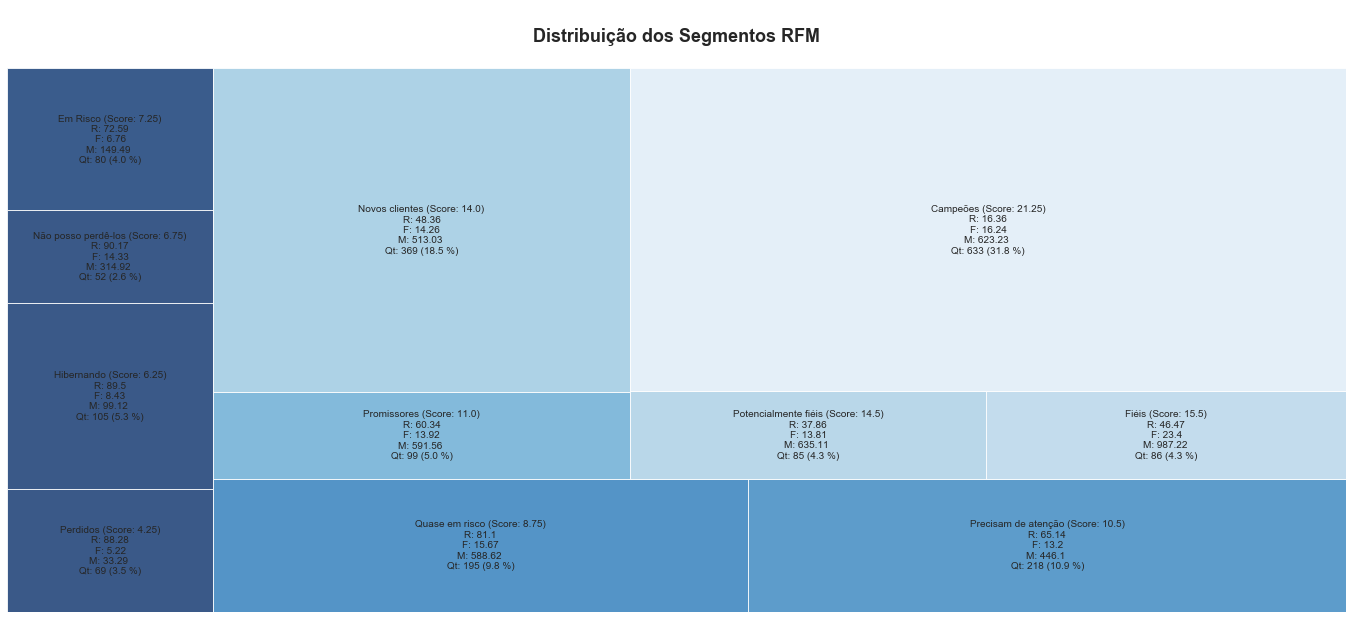

In [69]:
# Plota o gráfico dos segmentos RFM

labels = df_RFM_Segment_AGG.RFM_Segment + ' (Score: ' +  df_RFM_Segment_AGG.RFM_Score.map(str) +  ')\nR: ' +  df_RFM_Segment_AGG.RecencyMean.map(str) + '\nF: ' + df_RFM_Segment_AGG.FrequencyMean.map(str) + '\nM: ' + df_RFM_Segment_AGG.MonetaryMean.map(str) \
+ ' \nQt: ' +  df_RFM_Segment_AGG.Count.map(str) + ' (' + (round(df_RFM_Segment_AGG.Count / df_RFM_Segment_AGG.Count.sum() * 100, 1) ).map(str) + ' %)'

size = df_RFM_Segment_AGG.Count

color_values =sorted( df_RFM_Segment_AGG.RFM_Score.values, reverse=True)

cmap = matplotlib.cm.Blues
mini=min(color_values)
maxi=max(color_values)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value*1.5)) for value in color_values]

fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(24, 10)
squarify.plot(sizes=size, 
              label=labels, 
              alpha=.8, 
              color=colors                    
             )
plt.title("\nDistribuição dos Segmentos RFM\n",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

In [70]:
# Adiciona os dados de RFM no dataframe tratado.
df_full_tratado.loc[:, 'RFM_Score'] = df_RFM['RFM_Score']
df_full_tratado.loc[:, 'RFM_Segment'] = df_RFM['RFM_Segment']

# Análise de Agrupamento (cluster) utilizando o K-means

- Nesta etapa vamos realizar uma breve análise de como os clientes estão agrupados. 
- Vamos utilizar o algoritmo K-means do scikit-learn.
- Utilizaremos nessa análise as informações de RFM calculadas na etapa anterior.

In [71]:
df_RFM.describe()

ID      Recency    Frequency     Monetary            R            F            M    RFM_Score
count   1991.000000  1991.000000  1991.000000  1991.000000  1991.000000  1991.000000  1991.000000  1991.000000
mean    5576.075339    48.912607    14.348066   519.503265     3.016575     2.832245     2.992466    12.670141
std     3245.767189    28.777773     7.515070   526.175024     1.411805     1.439914     1.420752     4.555089
min        0.000000     0.000000     4.000000     8.000000     1.000000     1.000000     1.000000     4.250000
25%     2805.500000    24.000000     7.000000    65.000000     2.000000     1.000000     2.000000     8.750000
50%     5430.000000    49.000000    14.000000   311.000000     3.000000     3.000000     3.000000    12.750000
75%     8399.500000    74.000000    20.000000   911.500000     4.000000     4.000000     4.000000    16.250000
max    11191.000000    99.000000    39.000000  2283.000000     5.000000     5.000000     5.000000    21.250000

In [72]:
# Seleciona os atributos previsores
atributos_previsores = df_RFM.iloc[:, 1:4]
atributos_previsores.shape

(1991, 3)


Distribuição das varíaveis RFM - Recência (R), Frequência (F), Monetaridade (M)



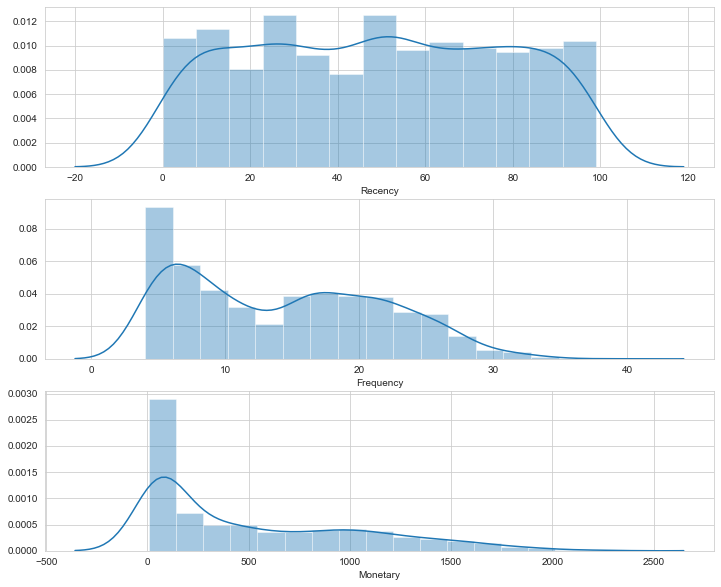

In [73]:
#  Distribuição das varíaveis RFM - Recência (R), Frequência (F), Monetaridade (M).
print('\nDistribuição das varíaveis RFM - Recência (R), Frequência (F), Monetaridade (M)\n')

plt.figure(figsize=(12,10))
plt.subplot(3, 1, 1); sns.distplot(atributos_previsores['Recency'])
plt.subplot(3, 1, 2); sns.distplot(atributos_previsores['Frequency'])
plt.subplot(3, 1, 3); sns.distplot(atributos_previsores['Monetary'])

plt.show()

In [74]:
# Tratar os valores zeros antes da tranformação de Log
atributos_previsores['Recency']   =  atributos_previsores['Recency'] + 0.0000000001
atributos_previsores['Frequency'] =  atributos_previsores['Frequency'] + 0.0000000001
atributos_previsores['Monetary']  =  atributos_previsores['Monetary'] + 0.0000000001


Distribuição das varíaveis RFM - Recência (R), Frequência (F), Monetaridade (M) após a tranformação de Log.



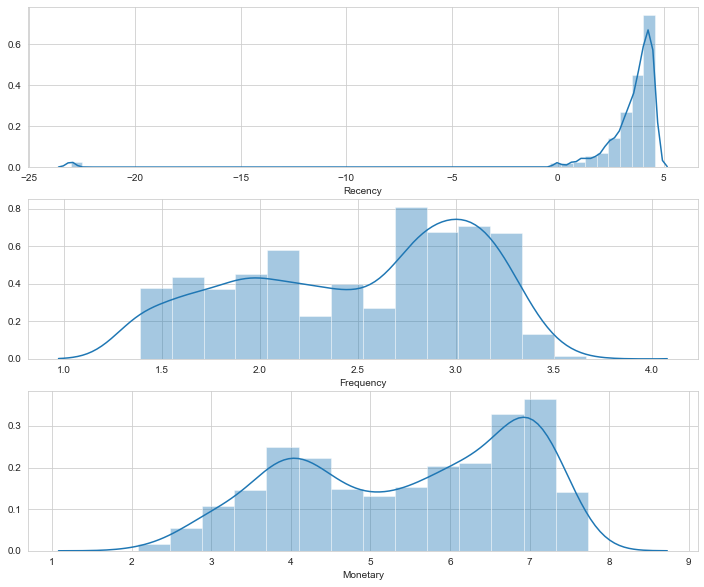

In [75]:
# Aplica a tranformação de Log para deixar os dados mais próximo da distribuição normal.
# Com isso vamos suavizar as diferenças entre os valores extremos e os demais:
atributos_previsores_log =  atributos_previsores[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

#  Distribuição das variáveis RFM - Recência (R), Frequência (F), Monetaridade (M) após a tranformação de Log.
print('\nDistribuição das varíaveis RFM - Recência (R), Frequência (F), Monetaridade (M) após a tranformação de Log.\n')
plt.figure(figsize=(12,10))
plt.subplot(3, 1, 1); sns.distplot(atributos_previsores_log['Recency'])
plt.subplot(3, 1, 2); sns.distplot(atributos_previsores_log['Frequency'])
plt.subplot(3, 1, 3); sns.distplot(atributos_previsores_log['Monetary'])
plt.show()

In [76]:
# StandardScaler para colocar todos os valores na mesma escala (escalonamento).
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
atributos_previsores_norm = scaler.fit_transform(atributos_previsores_log)
atributos_previsores_norm.shape

(1991, 3)

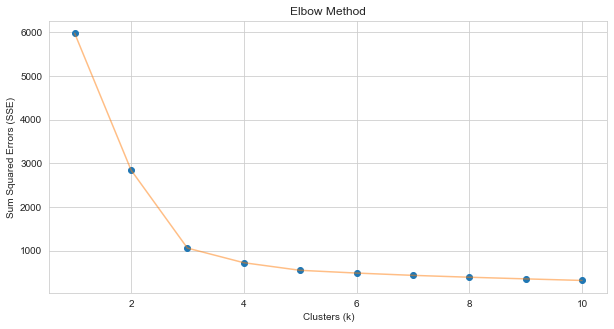

In [77]:
# Verificando a quantidade de Clusters ideal para este conjunto de dados.
# Basicamente existem três formas de fazer isso:
#    1 - Conhecimento Prévio da quatidade de Clusters;
#    2 - Sem conhecimento prévio da quatidade de Clusters, podemos usar a regra geral dada pela fórmula: cluters = Raiz quadrada de N/2, onde N é quatidade de registros;
#    3 - Utilizando o Elbow Method;
# Aqui vamos usar o Elbow Method (https://en.wikipedia.org/wiki/Elbow_method_(clustering))
# Após o valor indicado pelo “cotovelo” (curva acentuada) no gráfico indica que não possui ganho em relação ao aumento de clusters.
# Nesse ponto, significa que o método encontrou o número ideal para o argumento k.
# Obs: Nenhum destes métodos garante encontrar a quantidade ideal de cluters, para isso é necessário realizar diversos testes na base de dados.
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

# Para este estudo vamos considerar o número de Clusters igual a 5.

from sklearn.cluster import KMeans

# Within cluster sum of squares
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 1)
    kmeans.fit(atributos_previsores_norm)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (10 ,5))
plt.plot(range(1, 11), wcss, 'o')
plt.plot(np.arange(1 , 11) , wcss , '-' , alpha = 0.5)
plt.xlabel('Clusters (k)')
plt.ylabel('Sum Squared Errors (SSE)')
plt.title('Elbow Method');

In [78]:
# Cria a função para calcular o centroide dos clusters
def cacular_centroide(x, y):
    return (np.sum(x)/len(x), np.sum(y)/len(y))

In [79]:
# Cria a função para Plotar os graficos dos agrupamentos
def plota_graficos_clusters(atributos, previsoes, nome_algoritmo, x_label, y_label):

    colors = ['tab:blue','tab:green','tab:red','tab:orange','tab:purple','tab:cyan','tab:olive','tab:pink','tab:gray','gold']
    markers = ['*', '^', 'X', '+', 'D', 'H', 'o', '+', 's', 'v']
    
    plt.figure(figsize=(16,6))
    plt.title('Previsões Algoritmo ' + nome_algoritmo)   

    for i in np.unique(previsoes):
        
        x = atributos[previsoes == i][x_label].values
        y = atributos[previsoes == i][y_label].values
        centroide = cacular_centroide(x,y)

        if i < 0:
            nome =  'Sem Cluster ' + str(i)
            plt.scatter(x, y, s = 50, c = 'gray', label = nome, alpha=.7)
            plt.scatter(centroide[0],  centroide[1], marker = markers[i+1], s = 100, c = 'black',  label = (nome + '-Centoide'))
        else:
            nome = 'Cluster ' + str(i+1)          
            plt.scatter(x, y, s = 50, c = colors[i], label =  nome, alpha=.7)
            plt.scatter(centroide[0],  centroide[1], marker = markers[i+1], s = 100, c = 'black', label = (nome + '-Centoide'))

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

In [80]:
# Cria o modelo de agrupamgento KMeans
kmeans = KMeans(n_clusters = 5, random_state = 0)
previsoes_kmeans = kmeans.fit_predict(atributos_previsores_norm)

In [81]:
# Adiciona a coluna com o rotulo do cluster no dataframe RFM original
df_kmeans = df_RFM.assign(Cluster = kmeans.labels_)

# Observando as Estatística descritiva dos clusters.
df_kmeans[['Recency','Frequency', 'Monetary', 'Cluster']].groupby("Cluster").describe().round(0)

Recency                                          Frequency                                          Monetary                                                     
          count  mean   std  min   25%   50%   75%   max     count  mean  std   min   25%   50%   75%   max    count    mean    std    min    25%     50%     75%     max
Cluster                                                                                                                                                                  
0         745.0  50.0  28.0  1.0  26.0  51.0  73.0  99.0     745.0  22.0  4.0  12.0  19.0  22.0  25.0  39.0    745.0  1097.0  378.0  415.0  800.0  1049.0  1348.0  2283.0
1         343.0  48.0  28.0  1.0  24.0  49.0  73.0  99.0     343.0   5.0  1.0   4.0   4.0   5.0   5.0   7.0    343.0    32.0   14.0    8.0   21.0    31.0    42.0    81.0
2          26.0   0.0   0.0  0.0   0.0   0.0   0.0   0.0      26.0  15.0  8.0   4.0   8.0  14.0  20.0  31.0     26.0   425.0  400.0   11.0   93.0   293.0   657.0  1215.0
3         399.0  49.0  28.0  1.0  26.0  50.0  73.0  99.0     399.0  15.0  3.0  10.0  13.0  15.0  17.0  21.0    399.0   382.0  186.0  149.0  264.0   348.0   447.0  1511.0
4         478.0  50.0  29.0  1.0  24.0  50.0  77.0  99.0     478.0   8.0  1.0   6.0   7.0   8.0   9.0  12.0    478.0    89.0   40.0   31.0   60.0    77.0   114.0   263.0

In [82]:
# Agrupa o dataframe pelos clusters
df_kmeans_AGG = df_kmeans.groupby(['Cluster']).agg({'Recency': 'mean', 'Frequency': 'mean', 'Monetary': ['mean', 'count']}).round(2)
df_kmeans_AGG

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0         49.85     22.20  1097.00   745
1         48.28      4.91    32.12   343
2          0.00     14.69   425.08    26
3         49.46     15.04   381.88   399
4         50.11      8.29    89.18   478

In [83]:
df_kmeans.shape

(1991, 11)

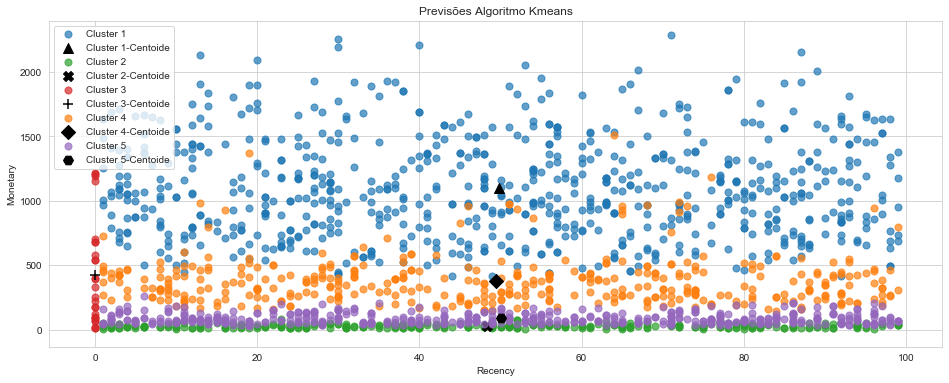

In [84]:
# Plota o grafico com os agrupamentos
plota_graficos_clusters(atributos_previsores,previsoes_kmeans, 'Kmeans', 'Recency', 'Monetary')

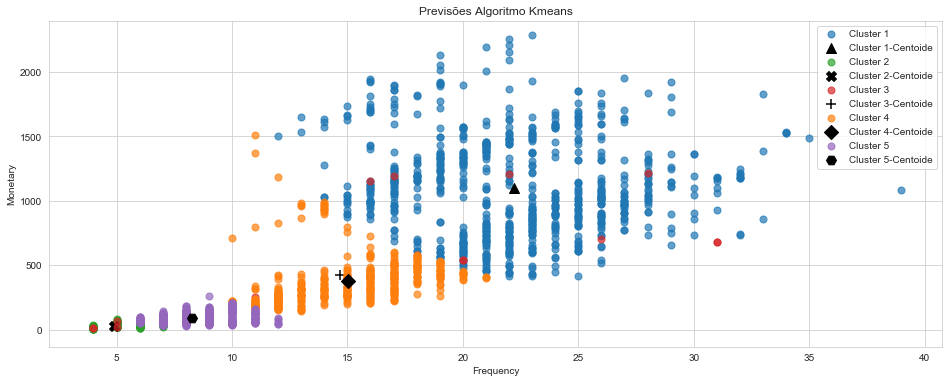

In [85]:
# Plota o grafico com os agrupamentos
plota_graficos_clusters(atributos_previsores,previsoes_kmeans, 'Kmeans', 'Frequency', 'Monetary')

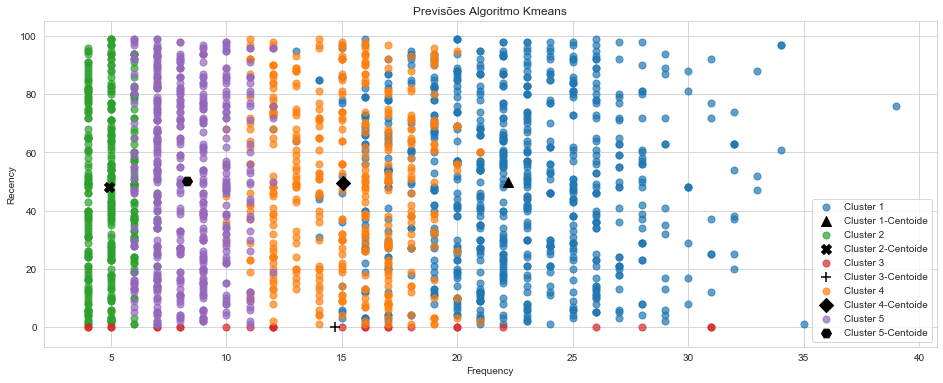

In [86]:
# Plota o grafico com os agrupamentos
plota_graficos_clusters(atributos_previsores,previsoes_kmeans, 'Kmeans', 'Frequency', 'Recency')

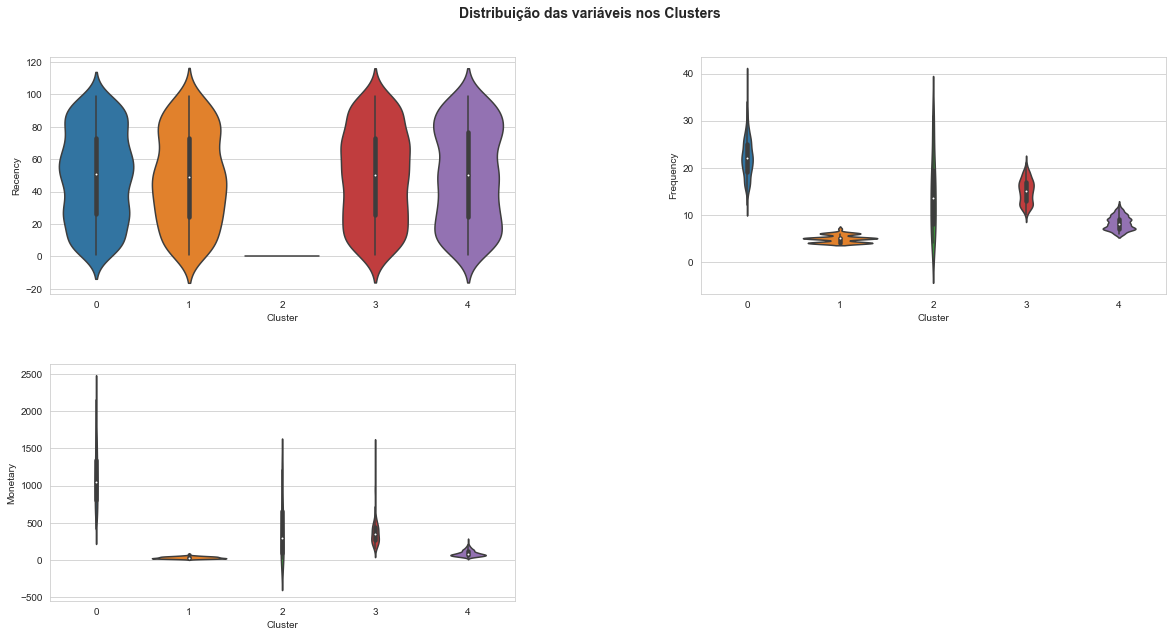

In [87]:
# Plota a distribuição dos clusters
plota_grafico_violino(df_kmeans, ['Recency', 'Frequency', 'Monetary'], 'Cluster', 'Distribuição das variáveis nos Clusters', total_colunas=2)

In [88]:
#Prepara o dataframe para melhor exibição
df_kmeans_AGG.columns = df_kmeans_AGG.columns.droplevel()
df_kmeans_AGG.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
df_kmeans_AGG.reset_index(inplace=True)
#df_kmeans_AGG.sort_values(by = 'RFM_Score', inplace=True)
df_kmeans_AGG

Cluster  RecencyMean  FrequencyMean  MonetaryMean  Count
0        0        49.85          22.20       1097.00    745
1        1        48.28           4.91         32.12    343
2        2         0.00          14.69        425.08     26
3        3        49.46          15.04        381.88    399
4        4        50.11           8.29         89.18    478

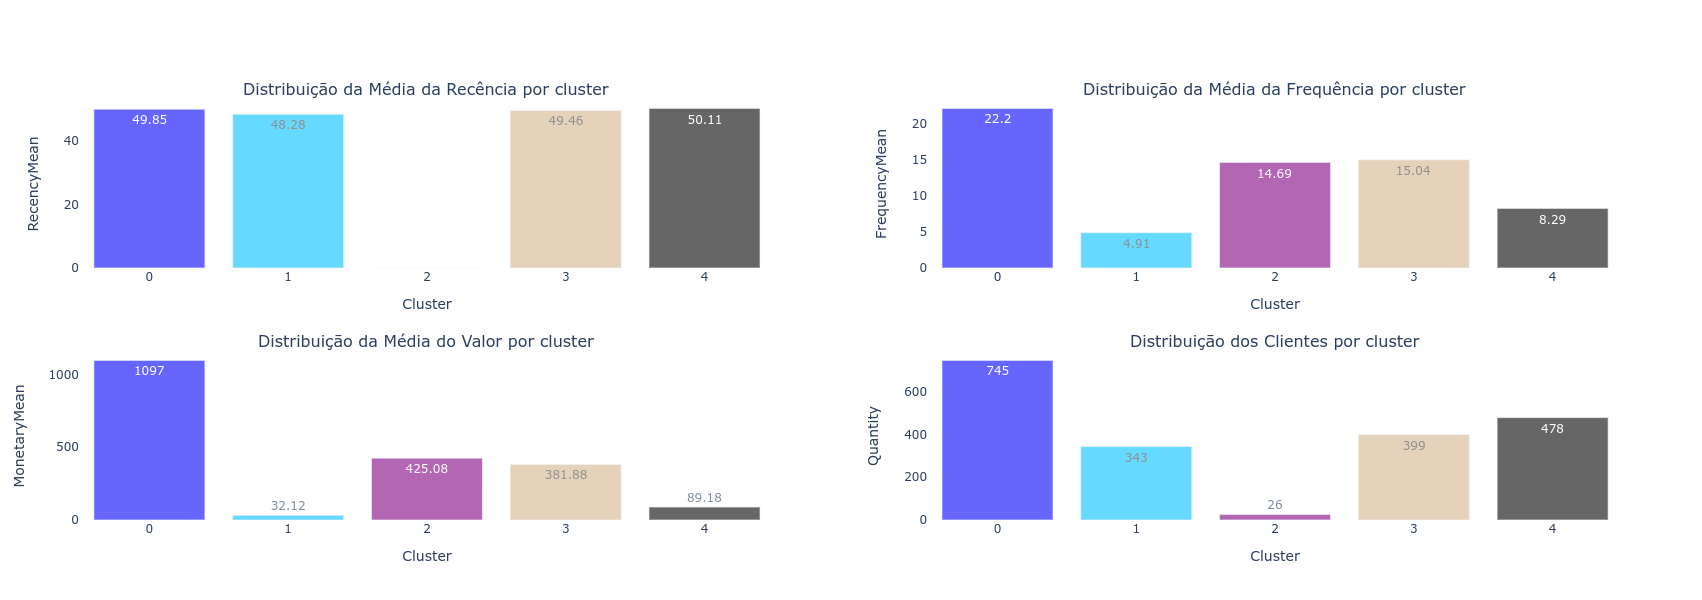

In [89]:
# Distribuição das variáveis por Cluster
trace1 =  go.Bar(x= df_kmeans_AGG.Cluster, y= df_kmeans_AGG.RecencyMean  , text=df_kmeans_AGG.RecencyMean  , textposition = 'auto', marker=dict(color=['blue', 'deepskyblue', 'purple', 'tan']) , opacity=0.6)
trace2 =  go.Bar(x= df_kmeans_AGG.Cluster, y= df_kmeans_AGG.FrequencyMean, text=df_kmeans_AGG.FrequencyMean, textposition = 'auto', marker=dict(color=['blue', 'deepskyblue', 'purple', 'tan']) , opacity=0.6 )
trace3 =  go.Bar(x= df_kmeans_AGG.Cluster, y= df_kmeans_AGG.MonetaryMean , text=df_kmeans_AGG.MonetaryMean , textposition = 'auto', marker=dict(color=['blue', 'deepskyblue', 'purple', 'tan'])  , opacity=0.6)
trace4 =  go.Bar(x= df_kmeans_AGG.Cluster, y= df_kmeans_AGG.Count        , text=df_kmeans_AGG.Count        , textposition = 'auto', marker=dict(color=['blue', 'deepskyblue', 'purple', 'tan'])  , opacity=0.6)

fig = make_subplots(rows=2, cols=2, 
                    subplot_titles=("Distribuição da Média da Recência por cluster", "Distribuição da Média da Frequência por cluster", "Distribuição da Média do Valor por cluster", "Distribuição dos Clientes por cluster")
                    ,vertical_spacing= 0.2) 

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 2)

fig.update_yaxes(row=1, col=1, title_text='RecencyMean')
fig.update_yaxes(row=1, col=2, title_text='FrequencyMean')
fig.update_yaxes(row=2, col=1, title_text='MonetaryMean')
fig.update_yaxes(row=2, col=2, title_text='Quantity')

fig.update_xaxes(row=1, col=1, title_text='Cluster', showline=False, linecolor='gray', tickmode='linear') 
fig.update_xaxes(row=1, col=2, title_text='Cluster', showline=False, linecolor='gray', tickmode='linear') 
fig.update_xaxes(row=2, col=1, title_text='Cluster', showline=False, linecolor='gray', tickmode='linear') 
fig.update_xaxes(row=2, col=2, title_text='Cluster', showline=False, linecolor='gray', tickmode='linear') 

fig.update_layout(plot_bgcolor='rgba(0,0,0,0)' , showlegend=False, height=600)

fig.show()  

### Análise dos Clusters criados pelo K-means utilizando os dados de RFM
- Cluster 0 - Temos os clientes que compraram já tem algum tempo, possuem ótima frequência de compras e que gastaram bastante;
- Cluster 1 - Temos os clientes que compraram já tem algum tempo, possuem baixa frequência de compras e que gastaram muito pouco;
- Cluster 2 - Temos os clientes que compraram muito recentemente, mas possuem uma razoável frequência de compras, e gastaram razoavelmente bem; 
- Cluster 3 - Temos os clientes que compraram já tem algum tempo, possuem boa frequência de compras e que gastaram um valor razoavel;
- Cluster 4 - Temos os clientes que compraram já tem tempo, possuem baixa frequência de compras e também gastaram muito pouco;


In [90]:
# Adiciona o Cluster no dataframe tratado.
df_full_tratado.loc[:,'Cluster' ] = df_kmeans['Cluster']

In [91]:
df_full_tratado.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Age Age_Group NumOffSprings  MntTotal  NumTotal  TotalAcceptedCmp  Prop_AcceptedCmp  PropWines  PropFruits  PropMeatProducts  PropFishProducts  PropSweetProducts  PropGoldProds  RFM_Score     RFM_Segment  Cluster
1  2174        1954  Graduation         Single  46344.0        1         1  2014-03-08       38        11          1                6                2                 1             6                  2                1                    1                  2                  5             0             0             0             0             0         0         0   66     60-69             2        27         6                 0               0.0   1.833333    0.166667          1.000000          0.333333           0.166667       1.000000      13.25  Novos clientes        1
2  4141        1965  Graduation       Together  71613.0        0         0  2013-08-21       26       426         49              127              111                21            42                  1                8                    2                 10                  4             0             0             0             0             0         0         0   55     50-59             0       776        21                 0               0.0  20.285714    2.333333          6.047619          5.285714           1.000000       2.000000      17.00        Campeões        0
3  6182        1984  Graduation       Together  26646.0        1         0  2014-02-10       26        11          4               20               10                 3             5                  2                2                    0                  4                  6             0             0             0             0             0         0         0   36     30-39             1        53         8                 0               0.0   1.375000    0.500000          2.500000          1.250000           0.375000       0.625000      14.00  Novos clientes        4
4  5324        1981         PhD        Married  58293.0        1         0  2014-01-19       94       173         43              118               46                27            15                  5                5                    3                  6                  5             0             0             0             0             0         0         0   39       >69             1       422        19                 0               0.0   9.105263    2.263158          6.210526          2.421053           1.421053       0.789474       7.50  Quase em risco        3
5  7446        1967      Master       Together  62513.0        0         1  2013-09-09       16       520         42               98                0                42            14                  2                6                    4                 10                  6             0             0             0             0             0         0         0   53     50-59             1       716        22                 0               0.0  23.636364    1.909091          4.454545          0.000000           1.909091       0.636364      20.00        Campeões        0

In [92]:
# Salva do Dataframe em CSV
#df_kmeans.to_csv('df_kmeans.csv', index=False, sep=';', encoding='utf-8-sig')

# Preparando os dados para o Modelo de Previsão
- Nesta etapa vamos selecioanr e tratar os dados para entrada no modelo de previsão


#### Seleção e Tratamento dos Atributos categoricos com textos

In [93]:
# Vamos tratar o atributo Marital_Status
atributo_marital = df_full_tratado['Marital_Status'].values
atributo_marital.shape

(1991,)

In [94]:
atributo_marital

array(['Single', 'Together', 'Together', ..., 'Divorced', 'Together',
       'Married'], dtype=object)

In [95]:
# Vamos realizar a codificação dos atributos categóricos em valores numéricos. Além disso, vai também realizar a binarização das variáveis categóricas. Técnica chamada: Dummy variables.
# Isto é importante para que o algoritmo não considere um valor maior mais importante que um valor menor, por exemplo.

from sklearn.preprocessing import OneHotEncoder

oneHotEnconder = OneHotEncoder(categories='auto')
atributo_marital_oh = oneHotEnconder.fit_transform(atributo_marital.reshape(-1,1)).toarray()
atributo_marital_oh.shape

(1991, 8)

In [96]:
atributo_marital_oh

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [97]:
# Vamos tratar o atributo Education
atributo_education = df_full_tratado['Education'].values
atributo_education.shape

(1991,)

In [98]:
atributo_education

array(['Graduation', 'Graduation', 'Graduation', ..., 'Graduation',
       'Master', 'PhD'], dtype=object)

In [99]:
# Vamos Realizar a codificação dos atributos categóricos em valores numéricos. Porém, como neste atributo existe uma "Ordem", pode ser importante fornecer essa infomação para o modelo.
# Por isso, vamos codificar ele usando o Ordinal Enconder para transformar as categorias em números ordinais.

from sklearn.preprocessing import OrdinalEncoder
ordinalEncoder= OrdinalEncoder(categories=[['Basic', '2n Cycle', 'Graduation','Master', 'PhD']])

atributo_education_oe = ordinalEncoder.fit_transform(atributo_education.reshape(-1,1))
atributo_education_oe.shape

(1991, 1)

In [100]:
atributo_education_oe

array([[2.],
       [2.],
       [2.],
       ...,
       [2.],
       [3.],
       [4.]])

#### Seleção e Tratamento dos Atributos Previsores restantes

In [101]:
df_full_tratado.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Age_Group', 'NumOffSprings', 'MntTotal', 'NumTotal', 'TotalAcceptedCmp', 'Prop_AcceptedCmp', 'PropWines', 'PropFruits', 'PropMeatProducts', 'PropFishProducts', 'PropSweetProducts', 'PropGoldProds', 'RFM_Score', 'RFM_Segment', 'Cluster'], dtype='object')

In [102]:
df_full_tratado.shape

(1991, 43)

In [103]:
#df_full_tratado.hist(figsize=(30,20));

In [104]:
# Vamos definir os atributos numéricos que usaremos como previsores.
# OBS: O atributos ID está na lista apenas permitir a ratreabilidade do registro. Ele não será inserido no modelo.
coluna_previsores_numericos = ['ID', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Age', 'NumOffSprings', 'MntTotal', 'NumTotal', 'TotalAcceptedCmp', 'Prop_AcceptedCmp', 'PropWines', 'PropFruits', 'PropMeatProducts', 'PropFishProducts', 'PropSweetProducts', 'PropGoldProds', 'RFM_Score']
previsores_numericos = df_full_tratado[coluna_previsores_numericos]
previsores_numericos.shape

(1991, 35)

#### Junção dos Atributos Previsores

In [105]:
# Vamos unir os atributos previsores categóricos e númericos.
atributos_previsores= np.concatenate((previsores_numericos, atributo_marital_oh, atributo_education_oe), axis=1)
atributos_previsores.shape

(1991, 44)

#### Seleção e Tratamento do Atributo alvo (Target)

In [106]:
# Seleciona o atributo Target
atributo_target = df_full_tratado['Response']
atributo_target.shape

(1991,)

In [107]:
atributo_target

1       0
2       0
3       0
4       0
5       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    1
Name: Response, Length: 1991, dtype: int64

### Padronizar os dados (Escalonamento)
- Nesta etapa vamos padronizar os dados para deixar todos na mesma escala.


In [108]:
atributos_previsores

array([[2174, 46344.0, 1, ..., 0.0, 0.0, 2.0],
       [4141, 71613.0, 0, ..., 0.0, 0.0, 2.0],
       [6182, 26646.0, 1, ..., 0.0, 0.0, 2.0],
       ...,
       [7270, 56981.0, 0, ..., 0.0, 0.0, 2.0],
       [8235, 69245.0, 0, ..., 0.0, 0.0, 3.0],
       [9405, 52869.0, 1, ..., 0.0, 0.0, 4.0]], dtype=object)

In [109]:
# Para o escalonamento dos dados, vamos utilizar a Padronização dos dados para ficaram na mesma escala.
# O escalonamento também ajuda no desempenho de algums algoritmos.
# Essa técnica na prática ignora a forma da distribuição e transforma o dado para forma com média próxima de zero e um desvio padrão próximo a um, ou seja, assume que não temos valores discrepantes nos dados e normaliza tudo.

atributos_previsores_pad = atributos_previsores

from sklearn.preprocessing import StandardScaler

#Padroniza os dados de X
scale_x = StandardScaler()

# Vamos deixar o atributo ID fora da padronização
atributos_previsores_pad[:, 1:atributos_previsores.shape[1]] = scale_x.fit_transform(atributos_previsores[:, 1:atributos_previsores.shape[1]].astype(float).astype(float))
atributos_previsores_pad.shape

(1991, 44)

In [110]:
atributos_previsores_pad

array([[2174, -0.16727263170846926, 0.9596130934339275, ...,
        -0.18947322781404152, -0.03171009961029958, -0.4326474660837798],
       [4141, 1.174205230515572, -0.8792605052445612, ...,
        -0.18947322781404152, -0.03171009961029958, -0.4326474660837798],
       [6182, -1.2129978653975413, 0.9596130934339275, ...,
        -0.18947322781404152, -0.03171009961029958, -0.4326474660837798],
       ...,
       [7270, 0.3974232415147341, -0.8792605052445612, ...,
        -0.18947322781404152, -0.03171009961029958, -0.4326474660837798],
       [8235, 1.0484931098243482, -0.8792605052445612, ...,
        -0.18947322781404152, -0.03171009961029958, 0.5689817257450637],
       [9405, 0.17912584274686608, 0.9596130934339275, ...,
        -0.18947322781404152, -0.03171009961029958, 1.5706109175739071]],
      dtype=object)

### PCA - Principal Component Analysis
- O PCA identifica a correlação entre variáveis, e caso haja uma forte correlação é possível reduzir a dimensionalidade;
- Vamos utilizar o PCA para verificar quantas componentes são necessárias para explicar os dados e se vale a pena utilizar-las reduzir a dimensionalidade dos dados;


In [111]:
# Análise de componetes principais
from sklearn.decomposition import PCA

X = atributos_previsores_pad[:, 1:atributos_previsores_pad.shape[1]] # Retira o atributo ID .
y = atributo_target

# PCA
pca = PCA(n_components=X.shape[1])
pca.fit(X)

X_pca =  pca.transform(X)


In [112]:
# O percentual da explicação das variáveis de acordo com o número de componentes principais (Variância explicada).
df_pca = pd.DataFrame(pca.explained_variance_ratio_.cumsum(), columns=['% Explicação'], index=range(1, pca.n_components+1))
df_pca.index.name = 'Qtd Componentes'
df_pca.transpose()

Qtd Componentes         1         2         3         4         5         6         7         8         9        10        11        12        13        14        15        16       17        18        19       20        21        22        23        24        25        26        27        28        29        30        31        32        33        34        35        36   37   38   39   40   41   42   43
% Explicação     0.270346  0.352489  0.422758  0.466675  0.509487  0.545195  0.577129  0.608332  0.638096  0.664374  0.690512  0.715271  0.739173  0.762428  0.785294  0.807608  0.82892  0.848711  0.868425  0.88715  0.903751  0.919826  0.934683  0.948075  0.960669  0.970526  0.979072  0.986226  0.992457  0.995616  0.997275  0.998013  0.998578  0.999013  0.999428  0.999814  1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [113]:
# Na tabela acima podemos ver que para ter um percentual aproximado de 99% de explicação do dados, iremos precisar de pelo 29/30 componentes.
# Por hora não vamos usar os componentes PCA.

## Balanceamento do dataset para o target

- Nesta etapa vamos verificar como está a distribuição da variável target no dataset.
- Essa verificação é importante, pois se uma classe tiver muitos registros em comparação com as outras, isso posso causar um viés nos algoritmos e isso vai deixar nosso modelo com resultados poucos satisfatórios, visto que ele vai tender a dar resultados em função da classe com mais observações.

In [114]:
atributo_target.shape

(1991,)

In [115]:
atributo_target.value_counts()

0    1745
1     246
Name: Response, dtype: int64

In [116]:
# Define o método para  plotar a Distribuição da variável Target. 
def plota_grafico_target(series_target, titulo):
    categoria= series_target.unique()
    dados = series_target.value_counts()

    fig = go.Figure()

    fig.add_trace(go.Bar(x=categoria, y=dados,   text=dados , textposition = 'auto', marker=dict(color=['dodgerblue', 'indianred'])))

    fig.update_layout(
        title=
        {
            'text': titulo ,           
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'

        }  ,

        plot_bgcolor='rgba(0,0,0,0)',        
        yaxis=dict(title='Quantidade'),    
        xaxis=dict(title='Response', tickmode='linear' ,  showline=True, linewidth=1, linecolor='gray') , barmode='stack',  width=800, height=400

        )

    fig.show()  

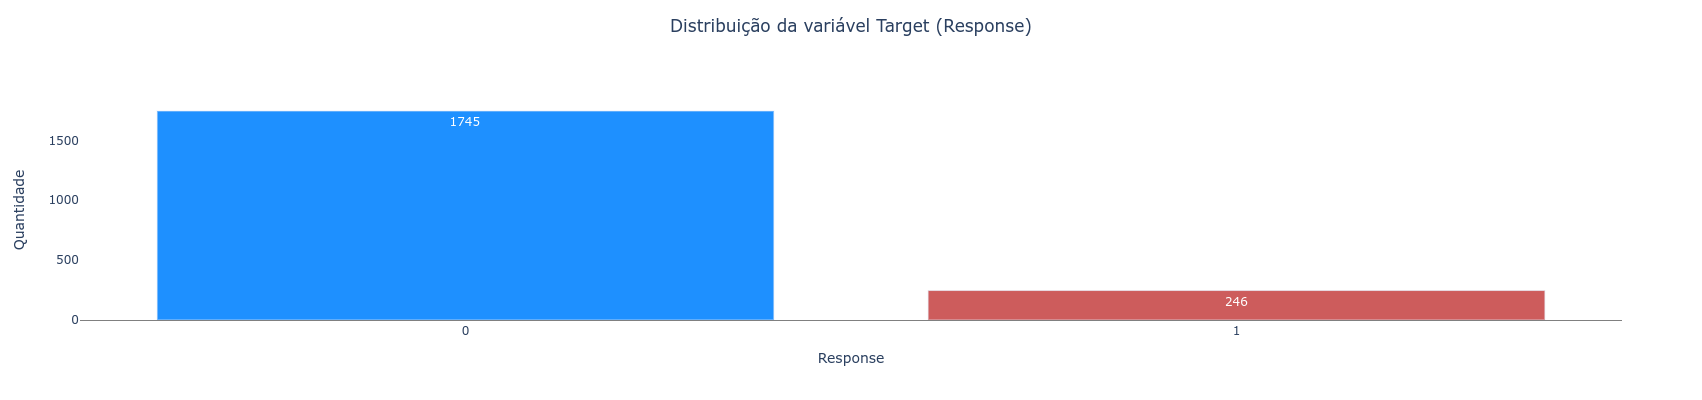

In [117]:
plota_grafico_target(atributo_target, 'Distribuição da variável Target (Response)')

In [118]:
# Como observamos acima, a variável target não está distribuída uniformimente no dataset, vamos precisar equilibrar essa distribuição para evitar viés nos algoritmos.
# Temos poucos registro para a classe 1, por isso vamos usar uma técnica chamada de OVER SAMPLING para aumentar a quantidade de observações da classe 1.
# Para isso vamos utilizar o SMOTE - Synthetic Minority Over-sampling Technique (https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html)

from imblearn.over_sampling import SMOTE

smote = SMOTE()
atributos_previsores_smote, atributo_target_smote = smote.fit_resample(atributos_previsores_pad, atributo_target)
atributo_target_smote.shape

(3490,)

In [119]:
atributo_target_smote.value_counts()

1    1745
0    1745
Name: Response, dtype: int64

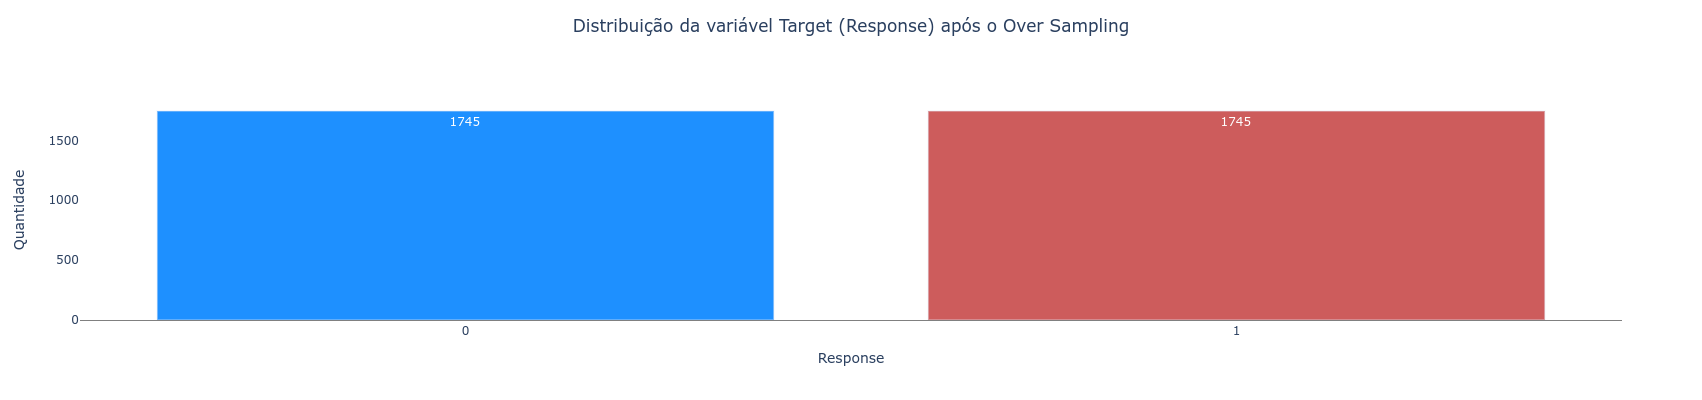

In [120]:
# Plota a Distribuição da variável Target (Response) após a aplicação OVER SAMPLING
plota_grafico_target(atributo_target_smote, 'Distribuição da variável Target (Response) após o Over Sampling' )

# Testando Alguns Algoritmos de Machine Learning
- Nesta etapa vamos testar alguns Algoritmos com os nossos dados e verificar qual teve o melhor desempenho.
- Vamos utilizar Validação cruzada (Cross-validation) para comparar os resultados.
- Porém é muito importante salientar que para ter certeza de que escolhemos o melhor algoritmo, para este conjunto de dados, o ideal seria testar todos os hyperparametros de cada algoritmo e comparar os resultados. Mas isso demandaria muito tempo e esforço. 
- Nosso objetivo aqui é apenas fazer um breve análise, por isso vamos limitar o uso dos hyperparametros.

In [121]:
# Importando as bibliotecas dos modelos
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import xgboost

from datetime import datetime

In [122]:
# Defindo os parâmetos do FOLD para a Validação cruzada (Cross-validation) 
qtd_instancias = len(atributos_previsores)
qtd_folds = 10
seed = 3

# Criando a lista de modelos para avaliação.
modelos = []
modelos.append(('AdaBoostClassifier', AdaBoostClassifier(random_state=0)))
modelos.append(('GradientBoostingClassifier', GradientBoostingClassifier(random_state=0)))
modelos.append(('RandomForestClassifier', RandomForestClassifier(n_estimators=20, criterion='entropy', random_state=0)))
modelos.append(('ExtraTreesClassifier', ExtraTreesClassifier(n_estimators=20, criterion='entropy', random_state=0)))
modelos.append(('DecisionTreeClassifier', DecisionTreeClassifier(random_state=0)))
modelos.append(('KNeighborsClassifier', KNeighborsClassifier()))
modelos.append(('NaiveBayes', GaussianNB( )))
modelos.append(('LogisticRegression', LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=10000, random_state=0)))
modelos.append(('SVC', SVC(random_state=0)))
modelos.append(('xgboost', xgboost.XGBClassifier(random_state=0)))
modelos.append(('Redes Neurais', MLPClassifier(verbose = False, max_iter=1000, tol = 0.0000010, solver = 'adam',  hidden_layer_sizes=(100), activation='relu', random_state=0)))


In [123]:
# Definindo as listas para análise dos resultados.
resultados = []
nomes_modelos = []
tempo_treinamento_modelos = []

previsores = atributos_previsores_smote[:, 1:atributos_previsores_smote.shape[1]] # Retira o atributo ID .
target = atributo_target_smote.values.ravel()

print('Resultado da Validação cruzada (Cross-validation) dos algoritmos:\n')
# Treina os Modelos
for nome_modelo, modelo in modelos:
    kfold = model_selection.KFold(n_splits=qtd_folds, random_state=seed, shuffle=True)
    #print(nome_modelo)
    #Define o tempo de inicio do Treinamento
    inicio = datetime.now()

    resultados_cros_val = model_selection.cross_val_score(modelo, previsores, target, cv=kfold, scoring='accuracy')
    
    #Define o tempo final do Treinamento
    fim = datetime.now()   
    tempo_modelo = (fim - inicio).total_seconds()
    tempo_treinamento_modelos.append( tempo_modelo)
    
    resultados.append(resultados_cros_val)   
    nomes_modelos.append(nome_modelo)        
    
    print('{:28s} Acurácia: {:6.4f} | Desvio Padrão: {:6.4f} | Tempo de Treinamento: {:6.2f} segundos'.format(nome_modelo, resultados_cros_val.mean(), resultados_cros_val.std(),  tempo_modelo))

Resultado da Validação cruzada (Cross-validation) dos algoritmos:

AdaBoostClassifier           Acurácia: 0.9295 | Desvio Padrão: 0.0101 | Tempo de Treinamento:   3.99 segundos
GradientBoostingClassifier   Acurácia: 0.9401 | Desvio Padrão: 0.0142 | Tempo de Treinamento:  16.68 segundos
RandomForestClassifier       Acurácia: 0.9424 | Desvio Padrão: 0.0163 | Tempo de Treinamento:   1.26 segundos
ExtraTreesClassifier         Acurácia: 0.9547 | Desvio Padrão: 0.0106 | Tempo de Treinamento:   0.63 segundos
DecisionTreeClassifier       Acurácia: 0.9040 | Desvio Padrão: 0.0177 | Tempo de Treinamento:   0.46 segundos
KNeighborsClassifier         Acurácia: 0.8894 | Desvio Padrão: 0.0184 | Tempo de Treinamento:   0.83 segundos
NaiveBayes                   Acurácia: 0.6926 | Desvio Padrão: 0.0361 | Tempo de Treinamento:   0.03 segundos
LogisticRegression           Acurácia: 0.8355 | Desvio Padrão: 0.0169 | Tempo de Treinamento:   0.29 segundos
SVC                          Acurácia: 0.9163 | Desvi

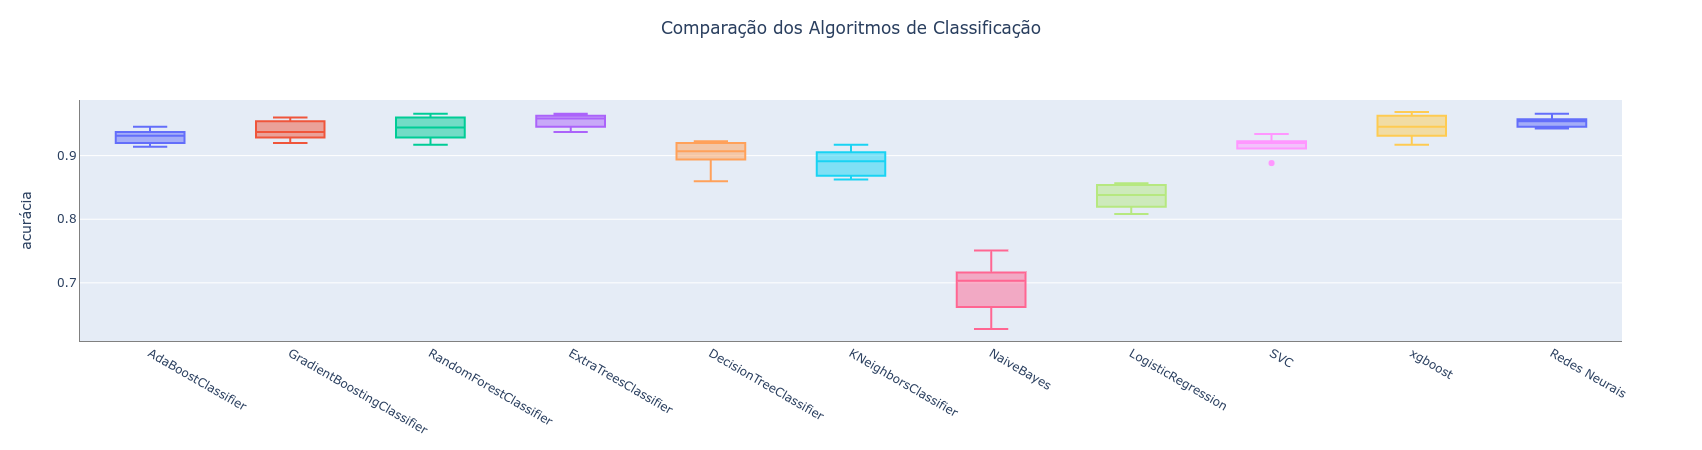

In [124]:
# Plota o gráfico para Comparação da acurácia dos Algoritmos
fig = go.Figure()

for model, result in zip(modelos, resultados):
    fig.add_trace(go.Box(y=result , name = model[0]))        
     
fig.update_layout( title={'text': 'Comparação dos Algoritmos de Classificação', 'y':0.95, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'}  ,
                    showlegend=False
                 )
fig.update_yaxes(title_text='acurácia', showline=True, linewidth=1,  linecolor='gray')
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray')   
fig.show()    


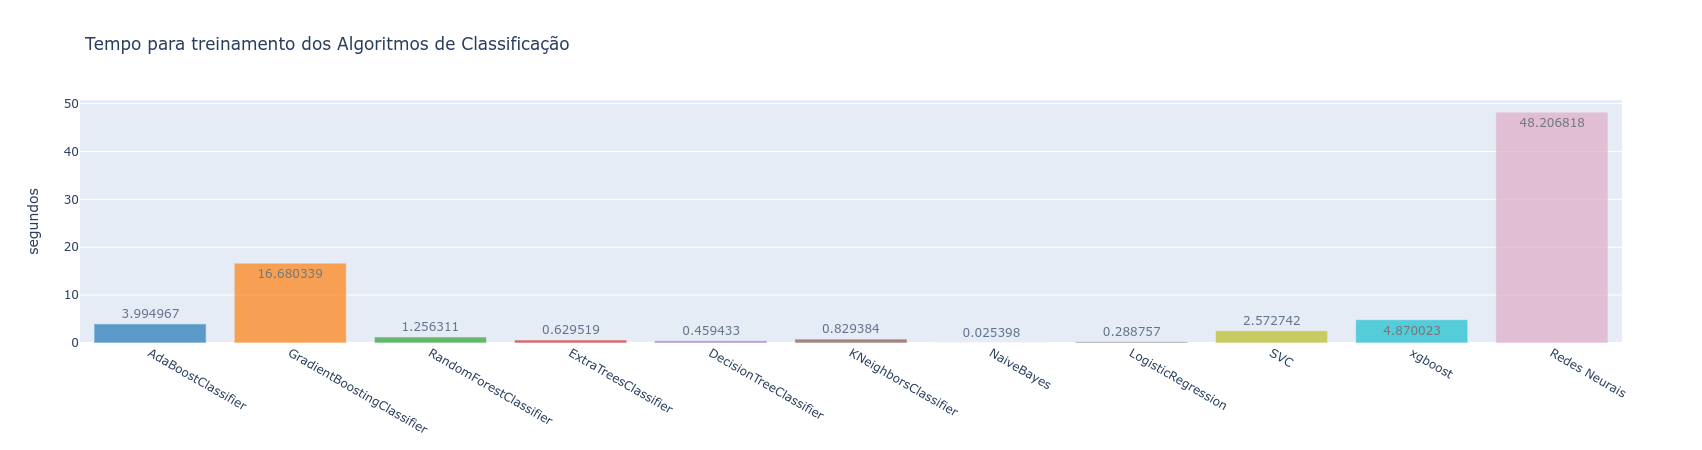

In [125]:
#Plota um gráfico de Comparação dos Tempo de treinamento dos Algoritmos de Classificação
cores = ['rgb(31, 119, 180)',
 'rgb(255, 127, 14)',
 'rgb(44, 160, 44)',
 'rgb(214, 39, 40)',
 'rgb(148, 103, 189)',
 'rgb(140, 86, 75)',
 'rgb(227, 119, 194)',
 'rgb(127, 127, 127)',
 'rgb(188, 189, 34)',
 'rgb(23, 190, 207)',
 'rgb(223, 170, 197)']

trace0= go.Bar(y=tempo_treinamento_modelos, x=nomes_modelos, textposition = 'auto', text=tempo_treinamento_modelos,  marker=dict(color=cores),opacity=0.7  )
data=[trace0]

layout = go.Layout(yaxis=dict(title='segundos') ,title='Tempo para treinamento dos Algoritmos de Classificação')
fig = go.Figure(data=data, layout=layout )
fig.show()


# Escolhendo um Modelo de Previsão
- Nessa etapa vamos escolher o algoritmo que apresentou o melhor resultado, conforme as considerações feitas na etapa anterior.

In [126]:
# O algoritmo de classificação que obteve o melhor resultado nos testes acima foi o ExtraTreesClassifier. Vamos selecionar ele.
# Criando o Modelo
classificador =   ExtraTreesClassifier(n_estimators=20,  random_state=0) 

In [127]:
# Separando os dados de Treinamento e Teste
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(atributos_previsores_smote, atributo_target_smote.values.ravel(), test_size = 0.3)

In [128]:
print('Shape dos dados de Treinamento')
print(X_treinamento.shape)
print(y_treinamento.shape)

Shape dos dados de Treinamento
(2443, 44)
(2443,)


In [129]:
print('Shape dos dados de Teste')
print(X_teste.shape)
print(y_teste.shape)

Shape dos dados de Teste
(1047, 44)
(1047,)


In [130]:
# Treinando o modelo selecionado

# Retira o atributo ID antes do input no modelo   
X_treinamento_model  = X_treinamento[:, 1:X_treinamento.shape[1]]

classificador.fit(X_treinamento_model, y_treinamento)
classificador.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 20,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [131]:
# Realiza a previsão com os dados de Teste
X_teste_model = X_teste[:, 1:X_teste.shape[1]]
y_previsto = classificador.predict(X_teste_model)

In [132]:
# Precisão do modelo com os dados de teste
print('Acurácia do modelo com os dados de testes')
classificador.score(X_teste_model, y_teste).round(4)

Acurácia do modelo com os dados de testes


0.9436

In [133]:
# Identificando o nome da classe de acordo com a codificação
# Não Respondeu = 0  #Respondeu = 1
nome_classe = ['NãoRespondeu', 'Respondeu',]

In [134]:
# Relatório de Classificação

#precision -  daqueles que classifiquei como corretos, quantos efetivamente estavam corretos? 
#recall    -  quando realmente é da classe XPTO, o quão frequente você classifica como XPTO?
#f1-score  -  balanço entre a precisão e o recall. Combina precisão e recall em um número único que indique a qualidade geral do seu modelo (quanto maior melhor o modelo).
#support   -  número de ocorrência de cada classe.

from sklearn.metrics import classification_report
relatorio_classificacao = classification_report(y_teste, y_previsto, target_names=nome_classe ,digits=4)


print('\tRelatório de Classificação do modelo\n')
print(relatorio_classificacao)

	Relatório de Classificação do modelo

              precision    recall  f1-score   support

NãoRespondeu     0.9569    0.9342    0.9454       547
   Respondeu     0.9298    0.9540    0.9418       500

    accuracy                         0.9436      1047
   macro avg     0.9434    0.9441    0.9436      1047
weighted avg     0.9440    0.9436    0.9437      1047



In [135]:
# Visualizar a Matriz de confusão (confusion matrix)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_teste, y_previsto) 

df_cm = pd.DataFrame(cm, nome_classe,  nome_classe)

print('Obs.: Nas linhas temos as Classes reais e nas colunas as Classes previstas.\n')
print('\tMatriz de Confusão')
df_cm

Obs.: Nas linhas temos as Classes reais e nas colunas as Classes previstas.

	Matriz de Confusão


NãoRespondeu  Respondeu
NãoRespondeu           511         36
Respondeu               23        477

In [136]:
# Vamos inibir os avisos de FutureWarning.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Vamos importar a biblioteca Yellowbrick. Esta biblioteca nos ajuda no diagnóstico e visualização de modelos de Machine Learning.
from yellowbrick.classifier import ROCAUC

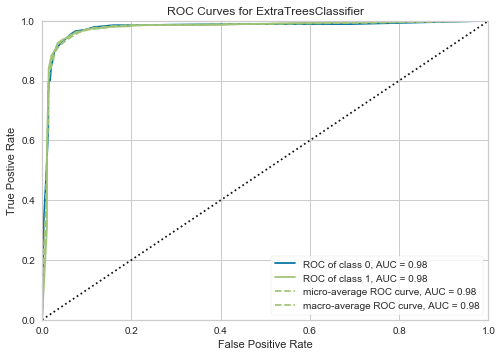

In [137]:
# Vamos plotar o gráfico das curvas ROC e AUC com a avaliação feita com a yellowbrick.

# A curva ROC nos mostra o quão bom está nosso modelo para poder distinguir entre duas coisas (já que é utilizado para classificação). Ela possui dois parâmtros importantes:
# Taxa de verdadeiro positivo (True Positive Rate), que tem a seguinte fórmula: true positives / (true positives + false negatives).
# Taxa de falso positivo (False Positive Rate), que tem a seguinte fórmula:     false positives / (false positives + true negatives).

# O valor da curva AUC varia no intervalo de 0 até 1 e o limiar entre a classe é 0,5. Ou seja, acima desse limite, o algoritmo classifica em uma classe e abaixo na outra classe.
# Quanto maior o AUC, melhor. O AUC trabalha com precisão das classificações e não com os valores absolutos.

visualizer = ROCAUC(classificador, classes=[0, 1])

visualizer.fit(X_treinamento_model, y_treinamento)        
visualizer.score(X_teste_model, y_teste)        
visualizer.show()  ;     

## Exibindo os dados de Teste após a Previsão

In [138]:
# Reverte a alteração da escala feita anteriormente
X_teste_scale = X_teste
X_teste_scale = scale_x.inverse_transform( X_teste[:, 1:X_teste.shape[1]])
X_teste_scale.shape

(1047, 43)

In [139]:
# Extrai o atributo Marital_Status condificado.
atrib_marital_oh = X_teste_scale[:, 34:42]
atrib_marital_oh.shape

(1047, 8)

In [140]:
# Reverte a codificação do OneHotEnconder feita anteriormente para os valores originais.
atrib_marital_orig = oneHotEnconder.inverse_transform(atrib_marital_oh)
atrib_marital_orig.shape

(1047, 1)

In [141]:
atrib_marital_orig

array([['Single'],
       ['Married'],
       ['Married'],
       ...,
       ['Married'],
       ['Divorced'],
       ['Widow']], dtype=object)

In [142]:
# Extrai o atributo Education condificado.
atrib_education_oe = X_teste_scale[:, 40:41]
atrib_education_oe.shape

(1047, 1)

In [143]:
# Reverte a alteração do OrdinalEncoder feita anteriormente  para os valores originais.
atrib_education_orig = ordinalEncoder.inverse_transform(atrib_education_oe)
atrib_education_orig.shape

(1047, 1)

In [144]:
atrib_education_orig

array([['Basic'],
       ['Basic'],
       ['Basic'],
       ...,
       ['Basic'],
       ['Basic'],
       ['Basic']], dtype=object)

In [145]:
# Extrai os atributos restantes.
X_teste_orig = X_teste_scale[:, 0:35]
X_teste_orig.shape

(1047, 35)

In [146]:
X_teste_orig[0]

array([6.06803427e+04, 2.60909398e-01, 2.60909398e-01, 4.58245335e+01,
       2.29306379e+02, 1.30690872e+02, 2.46177299e+02, 8.89981677e+01,
       7.89545301e+01, 1.25211775e+02, 4.08727518e+00, 7.00000000e+00,
       4.00000000e+00, 9.73909060e+00, 5.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.00863590e+01, 5.21818796e-01, 8.99339023e+02,
       2.48263658e+01, 0.00000000e+00, 0.00000000e+00, 9.26311843e+00,
       5.57104175e+00, 9.88546658e+00, 3.72390567e+00, 3.32163557e+00,
       5.38840517e+00, 1.63154564e+01, 0.00000000e+00])

In [147]:
X_teste_orig = np.concatenate((X_teste_orig, atrib_marital_orig, atrib_education_orig), axis=1)
X_teste_orig.shape

(1047, 37)

In [148]:
X_teste_orig[0]

array([60680.3426876861, 0.2609093977821739, 0.26090939778217387,
       45.82453348649521, 229.3063792868909, 130.69087226613914,
       246.17729881148477, 88.99816770202, 78.9545301108913,
       125.21177491271348, 4.087275182257391, 7.0, 4.0, 9.739090602217825,
       5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 60.08635903326739,
       0.5218187955643478, 899.3390230901396, 24.826365784475218, 0.0,
       0.0, 9.26311842630702, 5.571041746429296, 9.885466575277828,
       3.7239056708905265, 3.321635565766348, 5.388405167981775,
       16.315456386693043, 0.0, 'Single', 'Basic'], dtype=object)

In [149]:
colunas = coluna_previsores_numericos.copy()
colunas.append('Marital_Status')
colunas.append('Education')
len(colunas)

37

In [150]:
# Cria um dataframe com os dados de testes.
df_previsores = pd.DataFrame(X_teste_orig, columns=colunas)
df_previsores.head()

ID    Income   Kidhome Teenhome  Recency MntWines MntFruits MntMeatProducts MntFishProducts MntSweetProducts MntGoldProds NumDealsPurchases NumWebPurchases NumCatalogPurchases NumStorePurchases NumWebVisitsMonth AcceptedCmp3 AcceptedCmp4 AcceptedCmp5 AcceptedCmp1 AcceptedCmp2 Complain       Age NumOffSprings MntTotal  NumTotal TotalAcceptedCmp Prop_AcceptedCmp PropWines PropFruits PropMeatProducts PropFishProducts PropSweetProducts PropGoldProds RFM_Score Marital_Status Education
0  60680.3  0.260909  0.260909  45.8245  229.306  130.691   246.177         88.9982         78.9545          125.212      4.08728                 7               4             9.73909                 5                 0            0            0            0            0            0  60.0864  0.521819       899.339  24.8264         0                0          9.26312   5.57104    9.88547          3.72391          3.32164           5.38841       16.3155         0         Single     Basic
1    24711         0         0       86       10        7        25               6               3                7            1                 3               0                   3                 7                 0            0            0            0            0            0       38         0            58        7         0                0          1.42857         1    3.57143         0.857143         0.428571                 1          4.75         0        Married     Basic
2    19329         1         0       39       24        1        16              12               2                5            3                 4               0                   3                 8                 0            0            0            0            0            0       52         1            60       10         0                0              2.4       0.1        1.6              1.2              0.2               0.5          14.5         0        Married     Basic
3  65755.1  0.605571  0.605571  73.5777  282.745   38.654   291.708         21.3549         34.2713          52.5822      2.81671           5.42229               2             5.39443           4.63343                 0            0     0.394429            0            0            0  44.8724   1.21114       721.316  15.6334  0.394429        0.0788857          18.6334   3.22117    22.8456          1.71229          2.67091           3.99495       10.5986         0        Married     Basic
4  52385.7         0         0  13.7364  247.649  82.5972   337.081         82.9862         43.2921          61.9854      1.59723           4.19447         3.61107             8.98617           3.38893                 0            0            0            0            0            0  44.2775         0       855.592  18.3889         0                0          14.5524    4.5427    19.0743          4.55208           2.2653            3.6128       18.1076         0         Single     Basic

In [151]:
# Cria um Dataframe com a classe Prevista
df_prev = pd.DataFrame(y_previsto, columns=['CLASS_PREDICT'])

# Cria um Dataframe com a classe Real
df_real = pd.DataFrame(y_teste, columns=['CLASS_REAL'])

# Junta os dois dataframes
df_target = pd.merge(df_real, df_prev, right_index=True, left_index=True)
df_target['PREDICT_SUCCESS'] = df_target.CLASS_PREDICT == df_target.CLASS_REAL


In [152]:
# Agora juntando os dataframes de previsores e target
df_merge = pd.merge(df_previsores, df_target, right_index=True, left_index=True)

In [153]:
# Exibindo a quantidade de acertos e erros da previsão
print('\nQuantidade de acertos e erros da previsão')
df_merge[['ID', 'PREDICT_SUCCESS']].groupby(['PREDICT_SUCCESS']).count()


Quantidade de acertos e erros da previsão


ID
PREDICT_SUCCESS     
False             59
True             988

In [154]:
# Exibindo somente os registros onde houve erro na previsão da classe.
print('\nRegistros com erros na previsão')
df_merge[df_merge.PREDICT_SUCCESS==False]


Registros com erros na previsão


ID Income    Kidhome Teenhome  Recency     MntWines MntFruits MntMeatProducts MntFishProducts MntSweetProducts MntGoldProds NumDealsPurchases NumWebPurchases NumCatalogPurchases NumStorePurchases NumWebVisitsMonth AcceptedCmp3 AcceptedCmp4 AcceptedCmp5 AcceptedCmp1 AcceptedCmp2 Complain      Age NumOffSprings MntTotal NumTotal TotalAcceptedCmp Prop_AcceptedCmp  PropWines PropFruits PropMeatProducts PropFishProducts PropSweetProducts PropGoldProds RFM_Score Marital_Status Education  CLASS_REAL  CLASS_PREDICT  PREDICT_SUCCESS
6       50014      1          0        9      234           14        77              19              10               42            2                 4               1                   8                 5                 0            0            0            0            0            0       52        1           396       15        0                0             15.6   0.933333    5.13333          1.26667         0.666667               2.8         18.75         0         Single     Basic           0              1            False
33      62551      0          0       27      125           16        98             134              21               27            1                 6               7                   4                 3                 1            0            0            0            0            0       67        0           421       18        1              0.2          6.94444   0.888889    5.44444          7.44444          1.16667               1.5          16.5         0       Divorced     Basic           0              1            False
73      46904      1          1       20      153            4        56               0               9               31            4                 5               1                   4                 8                 0            0            0            0            0            0       53        2           253       14        0                0          10.9286   0.285714          4                0         0.642857           2.21429         15.75         0         Single     Basic           0              1            False
77      80812      0          0       95      769           22       500             210             143               33            1                 4               8                   5                 2                 1            0            1            1            0            0       67        0          1677       18        3              0.6          42.7222    1.22222    27.7778          11.6667          7.94444           1.83333           8.5         0       Together     Basic           0              1            False
87      70844      1          1       16      129           26        67               3              67                2            5                 6               1                   5                 7                 0            0            0            0            0            0       53        2           294       17        0                0          7.58824    1.52941    3.94118         0.176471          3.94118          0.117647         18.75         0       Divorced     Basic           0              1            False
96      41021      1          0       12       14            7         9               6              16               12            2                 2               0                   3                 6                 0            0            0            0            0            0       51        1            64        7        0                0                2          1    1.28571         0.857143          2.28571           1.71429         16.75         0       Together     Basic           1              0            False
109     34596      1          0       48       14 -3.55271e-15         2               0               0                7            1                 1               0                   2                 8                 0

In [155]:
# Salva do Dataframe em CSV
#df_merge.to_csv('df_teste_previsoes_modelo.csv', index=False, sep=';', encoding='utf-8-sig')

# Conclusão

- Como podemos observar nesse breve estudo, o uso de modelos preditivos podem vir a ser uma poderosa ferramenta de apoio a área de marketing na segmentação e classificação de clientes.

- É claro que esse estudo é apenas uma POC (prova de conceito) e modelagem apresentada aqui pode não ter o mesmo desempenho em um cenário real. Além disso, os resultados nos mostram que ainda há bastante espaço para melhorias, seja no tratamento e preparação dos dados, seleção das variáveis para o modelo e também na escolha dos algoritmos.

- Mesmo assim, fica evidente que pode valer a pena fazer uso destas técnicas, mesmo que o modelo em um ambiente real tenha um performance razoável, podemos economizar tempo e dinheiro limitando contatos com clientes que não têm interesses nos produtos oferecidos. Como também, direcionar melhor as campanhas de marketing de acordo com o perfil do cliente.